<a href="https://colab.research.google.com/github/arpadikuma/Colab_Projects/blob/main/ZTM_TF_DEV_2023_exercises_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISES for TensorFlow Developer Certificate ZtM

## Computer Vision & Convolutional Neural Networks in TensorFlow

### Tasks

1. Spend 20-minutes reading and interacting with the CNN explainer website.
 * What are the key terms? e.g. explain convolution in your own words, pooling in your own words
2. Play around with the "understanding hyperparameters" section in the CNN explainer website for 10-minutes.
 * What is the kernel size?
 * What is the stride?
 * How could you adjust each of these in TensorFlow code?
3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.
4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

#### 3. CNN On Own Datasets

In [ ]:
%cd C:\Users\ikuma\OneDrive\python\datascience\ZTM_Tensorflow

C:\Users\ikuma\OneDrive\python\datascience\ZTM_Tensorflow


In [ ]:
%cd "/content/drive/MyDrive/TF_sources"

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/TF_sources'
C:\Users\ikuma\OneDrive\python\datascience


In [ ]:
!ls dslr

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!ls "p&s"

ls: cannot access 'p&s': No such file or directory


In [ ]:
%cd TF_sources

[Errno 2] No such file or directory: 'TF_sources'
/content/drive/MyDrive/TF_sources


In [ ]:
# scan directories for folders and files
import os

def walk_through_dir(path):
    for dirpath, dirnames, filenames in os.walk(path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

walk_through_dir("cameras")

There are 2 directories and 0 images in 'cameras'
There are 2 directories and 0 images in 'cameras/train'
There are 0 directories and 116 images in 'cameras/train/dslr'
There are 0 directories and 102 images in 'cameras/train/compact'
There are 2 directories and 0 images in 'cameras/test'
There are 0 directories and 21 images in 'cameras/test/compact'
There are 0 directories and 28 images in 'cameras/test/dslr'


In [ ]:
# get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/drive/MyDrive/TF_sources/cameras/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['compact' 'dslr']


In [ ]:
# visualizing random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    """
    Visualizes a random image from target_class in target_dir+target_class
    """
    # setup target directory
    target_folder = target_dir + "/" + target_class

    # get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    # show image shape
    print(f"Image shape: {img.shape}")

    return img

Image shape: (300, 300, 3)


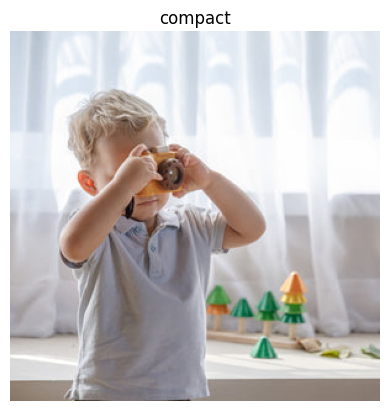

In [ ]:
img = view_random_image("/content/drive/MyDrive/TF_sources/cameras/train", "compact")

In [ ]:
# scaling the values
img/255

array([[[0.77254902, 0.81960784, 0.8745098 ],
        [0.77254902, 0.81960784, 0.8745098 ],
        [0.77647059, 0.82352941, 0.87843137],
        ...,
        [0.88235294, 0.90980392, 0.94117647],
        [0.88235294, 0.90980392, 0.94117647],
        [0.88627451, 0.91372549, 0.94509804]],

       [[0.77647059, 0.82352941, 0.87843137],
        [0.77647059, 0.82352941, 0.87843137],
        [0.77647059, 0.82352941, 0.87843137],
        ...,
        [0.88235294, 0.90980392, 0.94117647],
        [0.88235294, 0.90980392, 0.94117647],
        [0.88627451, 0.91372549, 0.94509804]],

       [[0.78039216, 0.82745098, 0.88235294],
        [0.78039216, 0.82745098, 0.88235294],
        [0.78039216, 0.82745098, 0.88235294],
        ...,
        [0.88235294, 0.90980392, 0.94117647],
        [0.88235294, 0.90980392, 0.94117647],
        [0.88627451, 0.91372549, 0.94509804]],

       ...,

       [[0.52941176, 0.4627451 , 0.4       ],
        [0.53333333, 0.46666667, 0.40392157],
        [0.5372549 , 0

In [ ]:
# image preprocessing

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.5,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=20,
                                  shear_range=0.2,
                                  zoom_range=0.5,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  horizontal_flip=True)

train_dir = "/content/drive/MyDrive/TF_sources/cameras/train/"
test_dir = "/content/drive/MyDrive/TF_sources/cameras/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="binary")

Found 217 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [ ]:
# mode checkpoint function
def create_model_checkpoint(model_name, monitor="val_loss", save_path="model_checkpoints"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor=monitor,
                                              verbose=1,
                                              save_best_only=True)

In [ ]:
# model creation
model = tf.keras.Sequential([
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPool2D(pool_size=2, padding="valid"),
    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPool2D(2),
    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
], name="model_CNN")

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# fit the model
history = model.fit(train_data,
                    epochs=15,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(len(test_data)*0.2),
                    callbacks=[create_model_checkpoint(model.name, monitor="val_accuracy")])

Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.7313 - accuracy: 0.5023 

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_data)

In [ ]:
model_loaded = tf.keras.models.load_model("/content/drive/MyDrive/TF_sources/model_checkpoints/model_CNN")

In [ ]:
model_loaded.evaluate(test_data)

2/2 [==============================] - 20s 17s/step - loss: 0.6845 - accuracy: 0.5918


[0.6844509840011597, 0.5918367505073547]

In [ ]:
%ls

10_food_classes_all_data/     cameras/   model_checkpoints/
10_food_classes_all_data.zip  __MACOSX/


In [ ]:
def prep_image(filename, img_shape=224, channels=3):
    """
    reads an image from filename
    turns image into tensor
    reshapes it to (img_shape, img_shape, color_channels)
    """
    # read in target file (image)
    img = tf.io.read_file(filename)

    # decode & convert to tensor
    img = tf.image.decode_image(img, channels=3)

    # resize image to img_shape
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # rescale image
    img = img/255
    return img

1/1 [==============================] - 0s 22ms/step


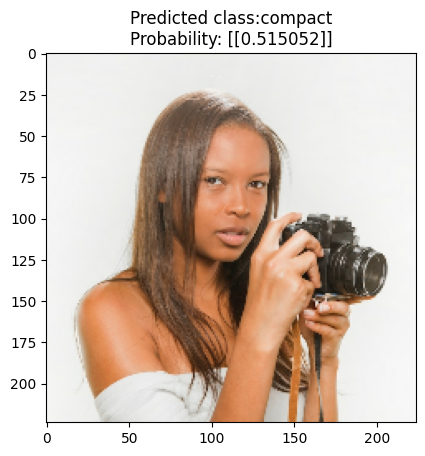

In [ ]:
range_num = 3
testfolder = "/content/drive/MyDrive/TF_sources/cameras/test"

category = random.choice(os.listdir(testfolder))
for _ in range(range_num):
    image_file = random.choice(os.listdir(testfolder + "/" + category))
    img = prep_image(testfolder + "/" + category + "/" + image_file)

    pred = model.predict(tf.expand_dims(img, axis=0))

    pred_class = class_names[pred.argmax()]
    plt.imshow(img)
    plt.title(f"Predicted class:{pred_class}\nProbability: {pred}");


#### 4. Ideal LR for 10 Class CNN

In [ ]:
%cd C:\Users\ikuma\OneDrive\python\datascience\ZTM_Tensorflow

C:\Users\ikuma\OneDrive\python\datascience\ZTM_Tensorflow


In [ ]:
%cd

/root


In [ ]:
# import the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


In [ ]:
import zipfile
# unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [ ]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is A880-61B5

 Directory of C:\Users\ikuma\OneDrive\python\datascience\ZTM_Tensorflow

28.05.2023  01:31    <DIR>          .
03.05.2023  15:20    <DIR>          ..
21.04.2023  19:55    <DIR>          .ipynb_checkpoints
21.04.2023  23:40    <DIR>          __pycache__
21.04.2023  23:41            14,266 07_food_vision_milestone_project1.ipynb
11.12.2020  00:33    <DIR>          10_food_classes_all_data
21.04.2023  23:40            10,246 helper_functions.py
28.05.2023  13:02    <DIR>          model_checkpoints
               2 File(s)         24,512 bytes
               6 Dir(s)  72,872,947,712 bytes free


In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# get class_names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names), print(len(class_names))

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']
10


(None, None)

Image shape: (512, 512, 3)


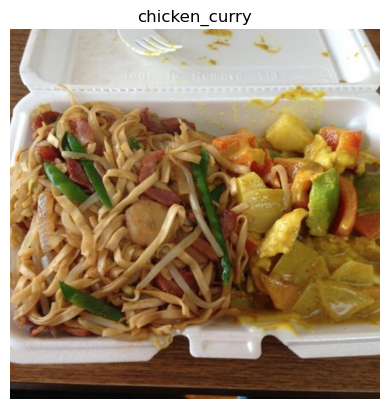

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

target_class = random.choice(class_names)
target_folder = train_dir + target_class

random_image = random.sample(os.listdir(target_folder), 1)

img = mpimg.imread(target_folder + "/" + random_image[0])
plt.imshow(img)
plt.title(target_class)
plt.axis("off");

print(f"Image shape: {img.shape}")

In [ ]:
# preprocess the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# create a model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


In [ ]:
!nvidia-smi

Sun May 28 13:05:30 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.79                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2070 S...  WDDM | 00000000:2D:00.0  On |                  N/A |
|  0%   33C    P5               25W / 235W|    944MiB /  8192MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# learning_rates = [0.00005, 0.0001, 0.001, 0.01]
# learning_rates = [0.0002, 0.0005, 0.0008]
learning_rates = [0.0007, 0.0008, 0.0009]

results = []
history = []
count=0
for lr in learning_rates:
    count += 1
    model_cnn2 = Sequential([
        Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
        Conv2D(10, 3, activation="relu"),
        MaxPool2D(),
        Conv2D(10, 3, activation="relu"),
        MaxPool2D(),
        Conv2D(10, 3, activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(10, activation="softmax")
    ], name=f"model_CNN2_{count}")
    model_cnn2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    history.append(model_cnn2.fit(train_data,
                                  epochs=15,
                                  verbose=1,
                                  validation_data=(test_data),
                                  validation_steps=int(len(test_data)*0.2),
                                  callbacks=[create_model_checkpoint(model_cnn2.name, monitor="val_accuracy")])
                                )
    validation_loss = model_cnn2.evaluate(test_data)
    results.append(validation_loss)

Epoch 1/15
235/235 [==============================] - ETA: 0s - loss: 2.2307 - accuracy: 0.1608
Epoch 1: val_accuracy improved from -inf to 0.25208, saving model to model_checkpoints\model_CNN2_1


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


235/235 [==============================] - 162s 686ms/step - loss: 2.2307 - accuracy: 0.1608 - val_loss: 2.0473 - val_accuracy: 0.2521
Epoch 2/15
235/235 [==============================] - ETA: 0s - loss: 2.0820 - accuracy: 0.2617
Epoch 2: val_accuracy improved from 0.25208 to 0.31667, saving model to model_checkpoints\model_CNN2_1


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


235/235 [==============================] - 133s 567ms/step - loss: 2.0820 - accuracy: 0.2617 - val_loss: 1.9721 - val_accuracy: 0.3167
Epoch 3/15
235/235 [==============================] - ETA: 0s - loss: 2.0187 - accuracy: 0.2925
Epoch 3: val_accuracy did not improve from 0.31667
235/235 [==============================] - 131s 556ms/step - loss: 2.0187 - accuracy: 0.2925 - val_loss: 1.9354 - val_accuracy: 0.3146
Epoch 4/15
235/235 [==============================] - ETA: 0s - loss: 1.9532 - accuracy: 0.3184
Epoch 4: val_accuracy improved from 0.31667 to 0.40417, saving model to model_checkpoints\model_CNN2_1


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


235/235 [==============================] - 132s 562ms/step - loss: 1.9532 - accuracy: 0.3184 - val_loss: 1.7448 - val_accuracy: 0.4042
Epoch 5/15
235/235 [==============================] - ETA: 0s - loss: 1.9321 - accuracy: 0.3348
Epoch 5: val_accuracy did not improve from 0.40417
235/235 [==============================] - 130s 554ms/step - loss: 1.9321 - accuracy: 0.3348 - val_loss: 1.7161 - val_accuracy: 0.3958
Epoch 6/15
235/235 [==============================] - ETA: 0s - loss: 1.9041 - accuracy: 0.3379
Epoch 6: val_accuracy did not improve from 0.40417
235/235 [==============================] - 128s 546ms/step - loss: 1.9041 - accuracy: 0.3379 - val_loss: 1.7698 - val_accuracy: 0.4021
Epoch 7/15
235/235 [==============================] - ETA: 0s - loss: 1.8688 - accuracy: 0.3595
Epoch 7: val_accuracy improved from 0.40417 to 0.41667, saving model to model_checkpoints\model_CNN2_1


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


235/235 [==============================] - 128s 545ms/step - loss: 1.8688 - accuracy: 0.3595 - val_loss: 1.7040 - val_accuracy: 0.4167
Epoch 8/15
235/235 [==============================] - ETA: 0s - loss: 1.8640 - accuracy: 0.3609
Epoch 8: val_accuracy improved from 0.41667 to 0.46250, saving model to model_checkpoints\model_CNN2_1


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


235/235 [==============================] - 127s 539ms/step - loss: 1.8640 - accuracy: 0.3609 - val_loss: 1.7127 - val_accuracy: 0.4625
Epoch 9/15
235/235 [==============================] - ETA: 0s - loss: 1.8283 - accuracy: 0.3833
Epoch 9: val_accuracy did not improve from 0.46250
235/235 [==============================] - 127s 540ms/step - loss: 1.8283 - accuracy: 0.3833 - val_loss: 1.6234 - val_accuracy: 0.4250
Epoch 10/15
235/235 [==============================] - ETA: 0s - loss: 1.8233 - accuracy: 0.3759
Epoch 10: val_accuracy did not improve from 0.46250
235/235 [==============================] - 126s 535ms/step - loss: 1.8233 - accuracy: 0.3759 - val_loss: 1.6332 - val_accuracy: 0.4333
Epoch 11/15
235/235 [==============================] - ETA: 0s - loss: 1.7884 - accuracy: 0.3988
Epoch 11: val_accuracy did not improve from 0.46250
235/235 [==============================] - 125s 531ms/step - loss: 1.7884 - accuracy: 0.3988 - val_loss: 1.6718 - val_accuracy: 0.4292
Epoch 12/15
235

INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_1\assets


235/235 [==============================] - 127s 539ms/step - loss: 1.7733 - accuracy: 0.3965 - val_loss: 1.5254 - val_accuracy: 0.4958
Epoch 14/15
235/235 [==============================] - ETA: 0s - loss: 1.7673 - accuracy: 0.3995
Epoch 14: val_accuracy did not improve from 0.49583
235/235 [==============================] - 128s 543ms/step - loss: 1.7673 - accuracy: 0.3995 - val_loss: 1.5770 - val_accuracy: 0.4708
Epoch 15/15
235/235 [==============================] - ETA: 0s - loss: 1.7456 - accuracy: 0.4092
Epoch 15: val_accuracy did not improve from 0.49583
79/79 [==============================] - 12s 154ms/step - loss: 1.5549 - accuracy: 0.4800
Epoch 1/15
235/235 [==============================] - ETA: 0s - loss: 2.1877 - accuracy: 0.1907
Epoch 1: val_accuracy improved from -inf to 0.23125, saving model to model_checkpoints\model_CNN2_2


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


235/235 [==============================] - 134s 568ms/step - loss: 2.1877 - accuracy: 0.1907 - val_loss: 2.0661 - val_accuracy: 0.2313
Epoch 2/15
235/235 [==============================] - ETA: 0s - loss: 2.0463 - accuracy: 0.2717
Epoch 2: val_accuracy improved from 0.23125 to 0.29792, saving model to model_checkpoints\model_CNN2_2


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


235/235 [==============================] - 132s 562ms/step - loss: 2.0463 - accuracy: 0.2717 - val_loss: 1.9213 - val_accuracy: 0.2979
Epoch 3/15
235/235 [==============================] - ETA: 0s - loss: 1.9658 - accuracy: 0.3109
Epoch 3: val_accuracy improved from 0.29792 to 0.38542, saving model to model_checkpoints\model_CNN2_2


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


235/235 [==============================] - 133s 566ms/step - loss: 1.9658 - accuracy: 0.3109 - val_loss: 1.8024 - val_accuracy: 0.3854
Epoch 4/15
235/235 [==============================] - ETA: 0s - loss: 1.9361 - accuracy: 0.3328
Epoch 4: val_accuracy did not improve from 0.38542
235/235 [==============================] - 133s 564ms/step - loss: 1.9361 - accuracy: 0.3328 - val_loss: 1.7705 - val_accuracy: 0.3812
Epoch 5/15
235/235 [==============================] - ETA: 0s - loss: 1.8912 - accuracy: 0.3503
Epoch 5: val_accuracy improved from 0.38542 to 0.42500, saving model to model_checkpoints\model_CNN2_2


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


235/235 [==============================] - 135s 575ms/step - loss: 1.8912 - accuracy: 0.3503 - val_loss: 1.7664 - val_accuracy: 0.4250
Epoch 6/15
235/235 [==============================] - ETA: 0s - loss: 1.8666 - accuracy: 0.3601
Epoch 6: val_accuracy improved from 0.42500 to 0.44375, saving model to model_checkpoints\model_CNN2_2


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


235/235 [==============================] - 130s 551ms/step - loss: 1.8666 - accuracy: 0.3601 - val_loss: 1.6587 - val_accuracy: 0.4437
Epoch 7/15
235/235 [==============================] - ETA: 0s - loss: 1.8515 - accuracy: 0.3699
Epoch 7: val_accuracy did not improve from 0.44375
235/235 [==============================] - 141s 600ms/step - loss: 1.8515 - accuracy: 0.3699 - val_loss: 1.8434 - val_accuracy: 0.3875
Epoch 8/15
235/235 [==============================] - ETA: 0s - loss: 1.8283 - accuracy: 0.3747
Epoch 8: val_accuracy improved from 0.44375 to 0.48125, saving model to model_checkpoints\model_CNN2_2


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


235/235 [==============================] - 158s 673ms/step - loss: 1.8283 - accuracy: 0.3747 - val_loss: 1.6122 - val_accuracy: 0.4812
Epoch 9/15
235/235 [==============================] - ETA: 0s - loss: 1.8153 - accuracy: 0.3795
Epoch 9: val_accuracy did not improve from 0.48125
235/235 [==============================] - 170s 725ms/step - loss: 1.8153 - accuracy: 0.3795 - val_loss: 1.6866 - val_accuracy: 0.4500
Epoch 10/15
235/235 [==============================] - ETA: 0s - loss: 1.7985 - accuracy: 0.3848
Epoch 10: val_accuracy did not improve from 0.48125
235/235 [==============================] - 146s 622ms/step - loss: 1.7985 - accuracy: 0.3848 - val_loss: 1.6538 - val_accuracy: 0.4667
Epoch 11/15
235/235 [==============================] - ETA: 0s - loss: 1.7745 - accuracy: 0.4011
Epoch 11: val_accuracy did not improve from 0.48125
235/235 [==============================] - 164s 698ms/step - loss: 1.7745 - accuracy: 0.4011 - val_loss: 1.5982 - val_accuracy: 0.4771
Epoch 12/15
235

INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_2\assets


235/235 [==============================] - 160s 679ms/step - loss: 1.7469 - accuracy: 0.4116 - val_loss: 1.6084 - val_accuracy: 0.5000
Epoch 14/15
235/235 [==============================] - ETA: 0s - loss: 1.7281 - accuracy: 0.4147
Epoch 14: val_accuracy did not improve from 0.50000
235/235 [==============================] - 165s 702ms/step - loss: 1.7281 - accuracy: 0.4147 - val_loss: 1.5455 - val_accuracy: 0.5000
Epoch 15/15
235/235 [==============================] - ETA: 0s - loss: 1.7086 - accuracy: 0.4216
Epoch 15: val_accuracy did not improve from 0.50000
79/79 [==============================] - 17s 218ms/step - loss: 1.5498 - accuracy: 0.4852
Epoch 1/15
235/235 [==============================] - ETA: 0s - loss: 2.1864 - accuracy: 0.1989
Epoch 1: val_accuracy improved from -inf to 0.32500, saving model to model_checkpoints\model_CNN2_3


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


235/235 [==============================] - 175s 738ms/step - loss: 2.1864 - accuracy: 0.1989 - val_loss: 1.9602 - val_accuracy: 0.3250
Epoch 2/15
235/235 [==============================] - ETA: 0s - loss: 2.0365 - accuracy: 0.2760
Epoch 2: val_accuracy did not improve from 0.32500
235/235 [==============================] - 172s 731ms/step - loss: 2.0365 - accuracy: 0.2760 - val_loss: 1.9319 - val_accuracy: 0.2917
Epoch 3/15
235/235 [==============================] - ETA: 0s - loss: 1.9783 - accuracy: 0.3069
Epoch 3: val_accuracy improved from 0.32500 to 0.36458, saving model to model_checkpoints\model_CNN2_3


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


235/235 [==============================] - 180s 764ms/step - loss: 1.9783 - accuracy: 0.3069 - val_loss: 1.9089 - val_accuracy: 0.3646
Epoch 4/15
235/235 [==============================] - ETA: 0s - loss: 1.9437 - accuracy: 0.3227
Epoch 4: val_accuracy did not improve from 0.36458
235/235 [==============================] - 179s 762ms/step - loss: 1.9437 - accuracy: 0.3227 - val_loss: 1.9124 - val_accuracy: 0.3313
Epoch 5/15
235/235 [==============================] - ETA: 0s - loss: 1.9140 - accuracy: 0.3317
Epoch 5: val_accuracy improved from 0.36458 to 0.38958, saving model to model_checkpoints\model_CNN2_3


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


235/235 [==============================] - 179s 761ms/step - loss: 1.9140 - accuracy: 0.3317 - val_loss: 1.7372 - val_accuracy: 0.3896
Epoch 6/15
235/235 [==============================] - ETA: 0s - loss: 1.8869 - accuracy: 0.3400
Epoch 6: val_accuracy improved from 0.38958 to 0.44167, saving model to model_checkpoints\model_CNN2_3


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


235/235 [==============================] - 172s 732ms/step - loss: 1.8869 - accuracy: 0.3400 - val_loss: 1.7056 - val_accuracy: 0.4417
Epoch 7/15
235/235 [==============================] - ETA: 0s - loss: 1.8620 - accuracy: 0.3573
Epoch 7: val_accuracy did not improve from 0.44167
235/235 [==============================] - 173s 733ms/step - loss: 1.8620 - accuracy: 0.3573 - val_loss: 1.7170 - val_accuracy: 0.4104
Epoch 8/15
235/235 [==============================] - ETA: 0s - loss: 1.8354 - accuracy: 0.3692
Epoch 8: val_accuracy did not improve from 0.44167
235/235 [==============================] - 176s 749ms/step - loss: 1.8354 - accuracy: 0.3692 - val_loss: 1.7634 - val_accuracy: 0.4167
Epoch 9/15
235/235 [==============================] - ETA: 0s - loss: 1.8136 - accuracy: 0.3808
Epoch 9: val_accuracy improved from 0.44167 to 0.45833, saving model to model_checkpoints\model_CNN2_3


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


235/235 [==============================] - 179s 760ms/step - loss: 1.8136 - accuracy: 0.3808 - val_loss: 1.6857 - val_accuracy: 0.4583
Epoch 10/15
235/235 [==============================] - ETA: 0s - loss: 1.7860 - accuracy: 0.4017
Epoch 10: val_accuracy did not improve from 0.45833
235/235 [==============================] - 176s 749ms/step - loss: 1.7860 - accuracy: 0.4017 - val_loss: 1.6879 - val_accuracy: 0.4333
Epoch 11/15
235/235 [==============================] - ETA: 0s - loss: 1.7676 - accuracy: 0.4028
Epoch 11: val_accuracy improved from 0.45833 to 0.46250, saving model to model_checkpoints\model_CNN2_3


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


235/235 [==============================] - 174s 740ms/step - loss: 1.7676 - accuracy: 0.4028 - val_loss: 1.6256 - val_accuracy: 0.4625
Epoch 12/15
235/235 [==============================] - ETA: 0s - loss: 1.7522 - accuracy: 0.4088
Epoch 12: val_accuracy did not improve from 0.46250
235/235 [==============================] - 157s 666ms/step - loss: 1.7522 - accuracy: 0.4088 - val_loss: 1.7038 - val_accuracy: 0.4042
Epoch 13/15
235/235 [==============================] - ETA: 0s - loss: 1.7376 - accuracy: 0.4056
Epoch 13: val_accuracy improved from 0.46250 to 0.47292, saving model to model_checkpoints\model_CNN2_3


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


235/235 [==============================] - 149s 631ms/step - loss: 1.7376 - accuracy: 0.4056 - val_loss: 1.5656 - val_accuracy: 0.4729
Epoch 14/15
235/235 [==============================] - ETA: 0s - loss: 1.7104 - accuracy: 0.4207
Epoch 14: val_accuracy improved from 0.47292 to 0.48750, saving model to model_checkpoints\model_CNN2_3


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


235/235 [==============================] - 168s 713ms/step - loss: 1.7104 - accuracy: 0.4207 - val_loss: 1.5717 - val_accuracy: 0.4875
Epoch 15/15
235/235 [==============================] - ETA: 0s - loss: 1.7022 - accuracy: 0.4289
Epoch 15: val_accuracy improved from 0.48750 to 0.49792, saving model to model_checkpoints\model_CNN2_3


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_CNN2_3\assets


79/79 [==============================] - 16s 207ms/step - loss: 1.5623 - accuracy: 0.4824


[5e-05, 0.0001, 0.001, 0.01]<br>
[[1.90347421169281, 0.31520000100135803], [1.8698076009750366, 0.3479999899864197], [1.735029935836792, 0.39959999918937683], [2.303008794784546, 0.10000000149011612]]

[0.0002, 0.0005, 0.0008]<br>
[[1.7856016159057617, 0.3815999925136566], [1.7617220878601074, 0.4059999883174896], [1.666764497756958, 0.44040000438690186]]

In [ ]:
print(learning_rates)
print(results)

[5e-05, 0.0001, 0.001, 0.01]
[[1.90347421169281, 0.31520000100135803], [1.8698076009750366, 0.3479999899864197], [1.735029935836792, 0.39959999918937683], [2.303008794784546, 0.10000000149011612]]


In [ ]:
print(history)

[<keras.callbacks.History object at 0x000001D43B106A60>, <keras.callbacks.History object at 0x000001D43F5BABE0>, <keras.callbacks.History object at 0x000001D43F9EF9D0>, <keras.callbacks.History object at 0x000001D43FDBBEE0>]


In [ ]:
print(learning_rates)
print(results)


[0.0002, 0.0005, 0.0008]
[[1.7856016159057617, 0.3815999925136566], [1.7617220878601074, 0.4059999883174896], [1.666764497756958, 0.44040000438690186]]


In [ ]:
print(learning_rates)
print(results)

[0.0007, 0.0008, 0.0009]
[[1.5549086332321167, 0.47999998927116394], [1.5497697591781616, 0.4851999878883362], [1.5623185634613037, 0.48240000009536743]]


In [ ]:
model_cnn3 = tf.keras.Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
], name="model_cnn3")

model_cnn3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

history_cnn3 = model_cnn3.fit(train_data,
                              epochs=15,
                              verbose=1,
                              validation_data=(test_data),
                              callbacks=[create_model_checkpoint(model_cnn3.name, monitor="val_accuracy")])

Epoch 1/15
235/235 [==============================] - ETA: 0s - loss: 2.1716 - accuracy: 0.2063
Epoch 1: val_accuracy improved from -inf to 0.29160, saving model to model_checkpoints\model_cnn3


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


235/235 [==============================] - 161s 684ms/step - loss: 2.1716 - accuracy: 0.2063 - val_loss: 1.9979 - val_accuracy: 0.2916
Epoch 2/15
235/235 [==============================] - ETA: 0s - loss: 2.0323 - accuracy: 0.2784
Epoch 2: val_accuracy improved from 0.29160 to 0.36320, saving model to model_checkpoints\model_cnn3


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


235/235 [==============================] - 167s 711ms/step - loss: 2.0323 - accuracy: 0.2784 - val_loss: 1.8609 - val_accuracy: 0.3632
Epoch 3/15
235/235 [==============================] - ETA: 0s - loss: 1.9703 - accuracy: 0.3103
Epoch 3: val_accuracy improved from 0.36320 to 0.36440, saving model to model_checkpoints\model_cnn3


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


235/235 [==============================] - 167s 709ms/step - loss: 1.9703 - accuracy: 0.3103 - val_loss: 1.8002 - val_accuracy: 0.3644
Epoch 4/15
235/235 [==============================] - ETA: 0s - loss: 1.9153 - accuracy: 0.3409
Epoch 4: val_accuracy improved from 0.36440 to 0.40160, saving model to model_checkpoints\model_cnn3


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


235/235 [==============================] - 162s 688ms/step - loss: 1.9153 - accuracy: 0.3409 - val_loss: 1.7528 - val_accuracy: 0.4016
Epoch 5/15
235/235 [==============================] - ETA: 0s - loss: 1.8904 - accuracy: 0.3508
Epoch 5: val_accuracy did not improve from 0.40160
235/235 [==============================] - 156s 665ms/step - loss: 1.8904 - accuracy: 0.3508 - val_loss: 1.8071 - val_accuracy: 0.4008
Epoch 6/15
235/235 [==============================] - ETA: 0s - loss: 1.8742 - accuracy: 0.3569
Epoch 6: val_accuracy improved from 0.40160 to 0.42080, saving model to model_checkpoints\model_cnn3


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


235/235 [==============================] - 174s 740ms/step - loss: 1.8742 - accuracy: 0.3569 - val_loss: 1.7059 - val_accuracy: 0.4208
Epoch 7/15
235/235 [==============================] - ETA: 0s - loss: 1.8459 - accuracy: 0.3636
Epoch 7: val_accuracy did not improve from 0.42080
235/235 [==============================] - 165s 704ms/step - loss: 1.8459 - accuracy: 0.3636 - val_loss: 1.7269 - val_accuracy: 0.4204
Epoch 8/15
235/235 [==============================] - ETA: 0s - loss: 1.8281 - accuracy: 0.3767
Epoch 8: val_accuracy did not improve from 0.42080
235/235 [==============================] - 160s 682ms/step - loss: 1.8281 - accuracy: 0.3767 - val_loss: 1.7426 - val_accuracy: 0.4092
Epoch 9/15
235/235 [==============================] - ETA: 0s - loss: 1.8092 - accuracy: 0.3797
Epoch 9: val_accuracy improved from 0.42080 to 0.42120, saving model to model_checkpoints\model_cnn3


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


235/235 [==============================] - 168s 714ms/step - loss: 1.8092 - accuracy: 0.3797 - val_loss: 1.7463 - val_accuracy: 0.4212
Epoch 10/15
235/235 [==============================] - ETA: 0s - loss: 1.8283 - accuracy: 0.3784
Epoch 10: val_accuracy improved from 0.42120 to 0.44080, saving model to model_checkpoints\model_cnn3


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


235/235 [==============================] - 176s 747ms/step - loss: 1.8283 - accuracy: 0.3784 - val_loss: 1.6433 - val_accuracy: 0.4408
Epoch 11/15
235/235 [==============================] - ETA: 0s - loss: 1.7962 - accuracy: 0.3899
Epoch 11: val_accuracy improved from 0.44080 to 0.44560, saving model to model_checkpoints\model_cnn3


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


235/235 [==============================] - 177s 755ms/step - loss: 1.7962 - accuracy: 0.3899 - val_loss: 1.6557 - val_accuracy: 0.4456
Epoch 12/15
235/235 [==============================] - ETA: 0s - loss: 1.7926 - accuracy: 0.3959
Epoch 12: val_accuracy improved from 0.44560 to 0.44680, saving model to model_checkpoints\model_cnn3


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_cnn3\assets


235/235 [==============================] - 172s 731ms/step - loss: 1.7926 - accuracy: 0.3959 - val_loss: 1.6753 - val_accuracy: 0.4468
Epoch 13/15
235/235 [==============================] - ETA: 0s - loss: 1.7808 - accuracy: 0.3856
Epoch 13: val_accuracy did not improve from 0.44680
235/235 [==============================] - 168s 715ms/step - loss: 1.7808 - accuracy: 0.3856 - val_loss: 1.7510 - val_accuracy: 0.4196
Epoch 14/15
235/235 [==============================] - ETA: 0s - loss: 1.7681 - accuracy: 0.4052
Epoch 14: val_accuracy did not improve from 0.44680
235/235 [==============================] - 165s 703ms/step - loss: 1.7681 - accuracy: 0.4052 - val_loss: 1.6612 - val_accuracy: 0.4440
Epoch 15/15
235/235 [==============================] - ETA: 0s - loss: 1.7711 - accuracy: 0.3964
Epoch 15: val_accuracy did not improve from 0.44680
235/235 [==============================] - 161s 683ms/step - loss: 1.7711 - accuracy: 0.3964 - val_loss: 1.7135 - val_accuracy: 0.4276


## Transfer Learning in TensorFlow Part 1: Feature Extraction Exercises

1. Build and fit a model using the same data we have here but with the MobileNetV2 architecture feature extraction (mobilenet_v2_100_224/feature_vector) from TensorFlow Hub, how does it perform compared to our other models?
2. Name 3 different image classification models on TensorFlow Hub that we haven't used.
3. Build a model to classify images of two different things you've taken photos of.
 * You can use any feature extraction layer from TensorFlow Hub you like for this.
 * You should aim to have at least 10 images of each class, for example to build a fridge versus oven classifier, you'll want 10 images of fridges and 10 images of ovens.
4. What is the current best performing model on ImageNet?
 * Hint: you might want to check sotabench.com for this.

### Tasks

In [ ]:
import os
import pathlib
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

#### 1. Build And Fit MobileNetV2 on 10 class 10 percent

In [ ]:
%cd C:\Users\ikuma\OneDrive\python\datascience\ZTM_Tensorflow

C:\Users\ikuma\OneDrive\python\datascience\ZTM_Tensorflow


##### Directory

In [ ]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent\test
There are 0 directories and 250 images in 10_food_classes_10_percent\test\chicken_curry
There are 0 directories and 250 images in 10_food_classes_10_percent\test\chicken_wings
There are 0 directories and 250 images in 10_food_classes_10_percent\test\fried_rice
There are 0 directories and 250 images in 10_food_classes_10_percent\test\grilled_salmon
There are 0 directories and 250 images in 10_food_classes_10_percent\test\hamburger
There are 0 directories and 250 images in 10_food_classes_10_percent\test\ice_cream
There are 0 directories and 250 images in 10_food_classes_10_percent\test\pizza
There are 0 directories and 250 images in 10_food_classes_10_percent\test\ramen
There are 0 directories and 250 images in 10_food_classes_10_percent\test\steak
There are 0 directories and 250 images in 10_food_classes_10_percent\test\sushi
There are 10 directori

##### Datasets

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SIZE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

print("Test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                                        target_size=IMAGE_SIZE,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Test images:
Found 2500 images belonging to 10 classes.


##### Create Callback Functions

In [ ]:
# callbacks
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

def create_model_checkpoint(model_name, monitor="val_loss", save_path="model_checkpoints"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor=monitor,
                                              verbose=1,
                                              save_best_only=True)

##### Model Selection & Creation

In [ ]:
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [ ]:
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
def create_model(model_url, num_classes=10):
    """
    takes a tensorflow hub url and creates a Keras Sequential model with it.

    Args
        model_url (str)
        num_classes (int)

    returns:
        an uncompiled Keras Sequential model with model_url as feature extractor layer and Dense output layer with num_classes outputs.
    """

    # download pretrained model and save as keras layer
    feature_extractor_layer = hub.KerasLayer(model_url,
                                             trainable=False,
                                             name="feature_extraction_layer",
                                             input_shape=IMAGE_SIZE+(3,))

    # create model
    model=tf.keras.Sequential([
        feature_extractor_layer,
        layers.Dense(num_classes, activation="softmax", name="output_layer")
    ], name="model_FE")

    return model

In [ ]:
mobilenet_model = create_model(mobilenet_url)

mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                        loss="categorical_crossentropy",
                        metrics=["accuracy"])

##### Model Training

In [ ]:
mobilenet_history = mobilenet_model.fit(train_data_10_percent,
                                        epochs=5,
                                        steps_per_epoch=len(train_data_10_percent),
                                        validation_data=test_data,
                                        validation_steps=len(test_data),
                                        callbacks=[create_model_checkpoint(mobilenet_model.name),
                                                   create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="mobilenetv2")])

Saving TensorBoard log files to: tensorflow_hub/mobilenetv2/20230606-012556
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0483 - accuracy: 0.3733
Epoch 1: val_loss improved from inf to 1.11724, saving model to model_checkpoints\model_FE
INFO:tensorflow:Assets written to: model_checkpoints\model_FE\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_FE\assets


24/24 [==============================] - 36s 1s/step - loss: 2.0483 - accuracy: 0.3733 - val_loss: 1.1172 - val_accuracy: 0.6308
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.8625 - accuracy: 0.7360
Epoch 2: val_loss improved from 1.11724 to 0.77492, saving model to model_checkpoints\model_FE
INFO:tensorflow:Assets written to: model_checkpoints\model_FE\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_FE\assets


24/24 [==============================] - 12s 531ms/step - loss: 0.8625 - accuracy: 0.7360 - val_loss: 0.7749 - val_accuracy: 0.7512
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.5809 - accuracy: 0.8213
Epoch 3: val_loss improved from 0.77492 to 0.70157, saving model to model_checkpoints\model_FE
INFO:tensorflow:Assets written to: model_checkpoints\model_FE\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_FE\assets


24/24 [==============================] - 14s 595ms/step - loss: 0.5809 - accuracy: 0.8213 - val_loss: 0.7016 - val_accuracy: 0.7732
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.4514 - accuracy: 0.8787
Epoch 4: val_loss improved from 0.70157 to 0.67609, saving model to model_checkpoints\model_FE
INFO:tensorflow:Assets written to: model_checkpoints\model_FE\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_FE\assets


24/24 [==============================] - 13s 573ms/step - loss: 0.4514 - accuracy: 0.8787 - val_loss: 0.6761 - val_accuracy: 0.7776
Epoch 5/5
24/24 [==============================] - ETA: 0s - loss: 0.3522 - accuracy: 0.9080
Epoch 5: val_loss improved from 0.67609 to 0.65504, saving model to model_checkpoints\model_FE
INFO:tensorflow:Assets written to: model_checkpoints\model_FE\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_FE\assets


24/24 [==============================] - 14s 613ms/step - loss: 0.3522 - accuracy: 0.9080 - val_loss: 0.6550 - val_accuracy: 0.7824


##### Evaluation

In [ ]:
mobilenet_model.evaluate(test_data)

79/79 [==============================] - 5s 68ms/step - loss: 0.6550 - accuracy: 0.7824


[0.6550363898277283, 0.7824000120162964]

#### 3. Build An Image Classification Model For Own Binary Dataset

In [ ]:
import os
import pathlib
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

##### Directory

In [ ]:
for dirpath, dirnames, filenames in os.walk("cameras"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

##### Datasets

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "cameras/train/"
test_dir = "cameras/test/"

train_datagen = ImageDataGenerator(rotation_range=20,
                                   rescale=1/255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(
    rescale=1/255
)

print("Training Images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Test Images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")


Training Images:
Found 217 images belonging to 2 classes.
Test Images:
Found 49 images belonging to 2 classes.


In [ ]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names), print(len(class_names))

['compact' 'dslr']
2


(None, None)

##### Model Selection & Creation

In [ ]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b6/classification/1"

In [ ]:
# download pretrained model and save as keras layer
feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                         trainable=False,
                                         name="feature_extractor_layer",
                                         input_shape=IMAGE_SIZE + (3,))

# create model
model =  tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(2, activation="sigmoid", name="output_layer")
], name="model_FE_eff_net_B6")

# compile model

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
efficientnet_history = model.fit(train_data,
                                 epochs=15,
                                 verbose=1,
                                 steps_per_epoch=len(train_data),
                                 validation_data=(test_data),
                                 validation_steps=len(test_data),
                                 callbacks=[create_model_checkpoint(model.name, monitor="accuracy")])

Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.5069
Epoch 1: accuracy improved from -inf to 0.50691, saving model to model_checkpoints\model_FE_eff_net_B6
INFO:tensorflow:Assets written to: model_checkpoints\model_FE_eff_net_B6\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_FE_eff_net_B6\assets


7/7 [==============================] - 108s 14s/step - loss: 0.6917 - accuracy: 0.5069 - val_loss: 0.6916 - val_accuracy: 0.4898
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.5622
Epoch 2: accuracy improved from 0.50691 to 0.56221, saving model to model_checkpoints\model_FE_eff_net_B6
INFO:tensorflow:Assets written to: model_checkpoints\model_FE_eff_net_B6\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_FE_eff_net_B6\assets


7/7 [==============================] - 69s 11s/step - loss: 0.6910 - accuracy: 0.5622 - val_loss: 0.6907 - val_accuracy: 0.6122
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.6544
Epoch 3: accuracy improved from 0.56221 to 0.65438, saving model to model_checkpoints\model_FE_eff_net_B6
INFO:tensorflow:Assets written to: model_checkpoints\model_FE_eff_net_B6\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_FE_eff_net_B6\assets


7/7 [==============================] - 77s 12s/step - loss: 0.6902 - accuracy: 0.6544 - val_loss: 0.6897 - val_accuracy: 0.6735
Epoch 4/15
7/7 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.6590
Epoch 4: accuracy improved from 0.65438 to 0.65899, saving model to model_checkpoints\model_FE_eff_net_B6
INFO:tensorflow:Assets written to: model_checkpoints\model_FE_eff_net_B6\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_FE_eff_net_B6\assets


7/7 [==============================] - 67s 11s/step - loss: 0.6894 - accuracy: 0.6590 - val_loss: 0.6888 - val_accuracy: 0.6939
Epoch 5/15
7/7 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.6313
Epoch 5: accuracy did not improve from 0.65899
7/7 [==============================] - 21s 3s/step - loss: 0.6885 - accuracy: 0.6313 - val_loss: 0.6879 - val_accuracy: 0.6939
Epoch 6/15
7/7 [==============================] - ETA: 0s - loss: 0.6882 - accuracy: 0.6267
Epoch 6: accuracy did not improve from 0.65899
7/7 [==============================] - 21s 3s/step - loss: 0.6882 - accuracy: 0.6267 - val_loss: 0.6870 - val_accuracy: 0.6735
Epoch 7/15
7/7 [==============================] - ETA: 0s - loss: 0.6872 - accuracy: 0.6175
Epoch 7: accuracy did not improve from 0.65899
7/7 [==============================] - 21s 3s/step - loss: 0.6872 - accuracy: 0.6175 - val_loss: 0.6862 - val_accuracy: 0.6735
Epoch 8/15
7/7 [==============================] - ETA: 0s - loss: 0.6853 -

INFO:tensorflow:Assets written to: model_checkpoints\model_FE_eff_net_B6\assets


7/7 [==============================] - 68s 11s/step - loss: 0.6853 - accuracy: 0.6728 - val_loss: 0.6854 - val_accuracy: 0.6735
Epoch 9/15
7/7 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.6406
Epoch 9: accuracy did not improve from 0.67281
7/7 [==============================] - 20s 3s/step - loss: 0.6861 - accuracy: 0.6406 - val_loss: 0.6845 - val_accuracy: 0.6735
Epoch 10/15
7/7 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.6406
Epoch 10: accuracy did not improve from 0.67281
7/7 [==============================] - 21s 3s/step - loss: 0.6850 - accuracy: 0.6406 - val_loss: 0.6836 - val_accuracy: 0.6735
Epoch 11/15
7/7 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.6037
Epoch 11: accuracy did not improve from 0.67281
7/7 [==============================] - 21s 3s/step - loss: 0.6852 - accuracy: 0.6037 - val_loss: 0.6828 - val_accuracy: 0.6531
Epoch 12/15
7/7 [==============================] - ETA: 0s - loss: 0.6

In [ ]:
model_loaded = tf.keras.models.load_model("model_checkpoints\model_FE_eff_net_B6")

In [ ]:
model_loaded.evaluate(test_data)

2/2 [==============================] - 7s 297ms/step - loss: 0.6821 - accuracy: 0.6531


[0.6820700764656067, 0.6530612111091614]

1/1 [==============================] - 0s 45ms/step


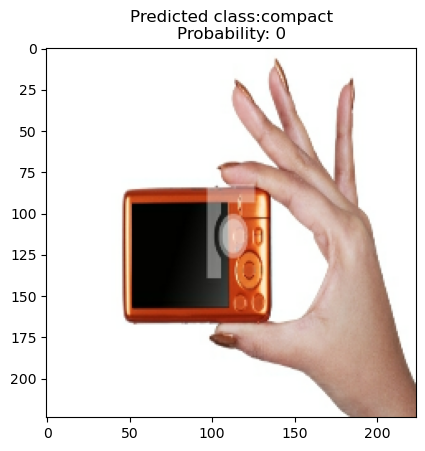

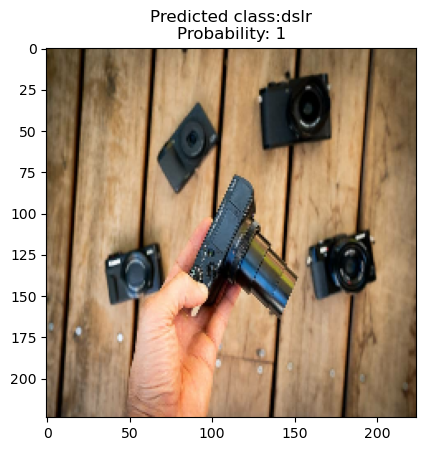

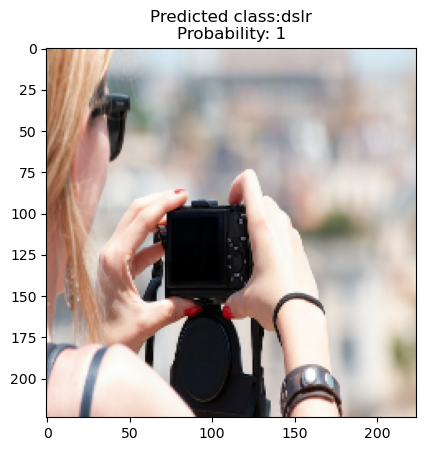

In [ ]:
range_num = 3

category = random.choice(os.listdir(test_dir))
for _ in range(range_num):
    image_file = random.choice(os.listdir(test_dir + "/" + category))
    img = prep_image(test_dir + "/" + category + "/" + image_file)

    pred = model.predict(tf.expand_dims(img, axis=0))

    pred_class = class_names[pred.argmax()]
    plt.figure()
    plt.imshow(img)
    plt.title(f"Predicted class:{pred_class}\nProbability: {pred.argmax()}")


## 05. Transfer Learning in TensorFlow Part 2: Fine-tuning Exercises

1. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.
2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?
3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?
4. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

### Tasks

#### Feature-Extraction on 10% Food Vision

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.0'

In [ ]:
import os
import pathlib
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
def plot_loss_curves(history):
    """
    returns separate loss curves for training and validation metrics
    requires accuracy metric
    """

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # plot loss
    plt.figure()
    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_acc, label="validation accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();

##### Directory

In [ ]:
%cd C:\Users\ikuma\OneDrive\python\datascience\ZTM_Tensorflow

C:\Users\ikuma\OneDrive\python\datascience\ZTM_Tensorflow


In [ ]:
for dirpath, dirname, filename in os.walk("10_food_classes_10_percent"):
    print(f"There are {len(dirname)} directories and {len(filename)} Images in {dirpath}")

There are 2 directories and 0 Images in 10_food_classes_10_percent
There are 10 directories and 0 Images in 10_food_classes_10_percent\test
There are 0 directories and 250 Images in 10_food_classes_10_percent\test\chicken_curry
There are 0 directories and 250 Images in 10_food_classes_10_percent\test\chicken_wings
There are 0 directories and 250 Images in 10_food_classes_10_percent\test\fried_rice
There are 0 directories and 250 Images in 10_food_classes_10_percent\test\grilled_salmon
There are 0 directories and 250 Images in 10_food_classes_10_percent\test\hamburger
There are 0 directories and 250 Images in 10_food_classes_10_percent\test\ice_cream
There are 0 directories and 250 Images in 10_food_classes_10_percent\test\pizza
There are 0 directories and 250 Images in 10_food_classes_10_percent\test\ramen
There are 0 directories and 250 Images in 10_food_classes_10_percent\test\steak
There are 0 directories and 250 Images in 10_food_classes_10_percent\test\sushi
There are 10 directori

##### Datasets

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                # rescale=1/255,
                                #    horizontal_flip=True,
                                #    width_shift_range=0.2,
                                #    height_shift_range=0.2,
                                #    zoom_range=0.2,
                                #    rotation_range=20,
                                #    shear_range=0.2
                                )

test_datagen = ImageDataGenerator(
    # rescale=1/255
)

print("Train images...")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Test images...")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Train images...
Found 750 images belonging to 10 classes.
Test images...
Found 2500 images belonging to 10 classes.


In [ ]:
print("Train images:")
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMAGE_SIZE)

print("Test images:")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMAGE_SIZE,
                                                                shuffle=False)

Train images:
Found 750 files belonging to 10 classes.
Test images:
Found 2500 files belonging to 10 classes.


##### Model Selection & Creation

In [ ]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1"

In [ ]:
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name="data_augmentation")

input_shape = IMAGE_SIZE +(3,)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs  = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_5_data_aug_seq = tf.keras.Model(inputs, outputs, name="EffNetB0_dataaug_FE_1")

model_5_data_aug_seq.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

##### Callback functions

In [ ]:
# callbacks
import datetime

def create_tensorboard_callback(experiment_name, dir_name="tensorboard_data"):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

def create_model_checkpoint(model_name, monitor="val_loss", save_path="model_checkpoints"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor=monitor,
                                              verbose=1,
                                              save_best_only=True)

In [ ]:
train_data, test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>)

##### Model Training

In [ ]:
initial_epochs = 5
history_10_percent_data_aug_seq = model_5_data_aug_seq.fit(train_data,
                                            epochs=initial_epochs,
                                            validation_data=test_data,
                                            # validation_steps=int(0.25*len(test_data)),
                                            validation_steps=len(test_data),
                                            callbacks=[create_tensorboard_callback("tensorflow_hub", "effiNetB0_10p"), create_model_checkpoint(model_5_data_aug_seq.name, monitor="val_accuracy")]
                                            )

Saving TensorBoard log files to: effiNetB0_10p/tensorflow_hub/20230615-024613
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9903 - accuracy: 0.3387
Epoch 1: val_accuracy improved from -inf to 0.65320, saving model to model_checkpoints\EffNetB0_dataaug_FE_1


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


24/24 [==============================] - 52s 2s/step - loss: 1.9903 - accuracy: 0.3387 - val_loss: 1.4609 - val_accuracy: 0.6532
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3000 - accuracy: 0.6960
Epoch 2: val_accuracy improved from 0.65320 to 0.77720, saving model to model_checkpoints\EffNetB0_dataaug_FE_1


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


24/24 [==============================] - 45s 2s/step - loss: 1.3000 - accuracy: 0.6960 - val_loss: 1.0077 - val_accuracy: 0.7772
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9885 - accuracy: 0.7800
Epoch 3: val_accuracy improved from 0.77720 to 0.81000, saving model to model_checkpoints\EffNetB0_dataaug_FE_1


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


24/24 [==============================] - 45s 2s/step - loss: 0.9885 - accuracy: 0.7800 - val_loss: 0.8045 - val_accuracy: 0.8100
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8399 - accuracy: 0.8000
Epoch 4: val_accuracy improved from 0.81000 to 0.83240, saving model to model_checkpoints\EffNetB0_dataaug_FE_1


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


24/24 [==============================] - 45s 2s/step - loss: 0.8399 - accuracy: 0.8000 - val_loss: 0.7002 - val_accuracy: 0.8324
Epoch 5/5
24/24 [==============================] - ETA: 0s - loss: 0.7348 - accuracy: 0.8267
Epoch 5: val_accuracy improved from 0.83240 to 0.84200, saving model to model_checkpoints\EffNetB0_dataaug_FE_1


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


24/24 [==============================] - 44s 2s/step - loss: 0.7348 - accuracy: 0.8267 - val_loss: 0.6345 - val_accuracy: 0.8420


##### Evaluation

In [ ]:
results_5_1b = model_5_1.evaluate(test_data)
print(results_5_1)
print(results_5_1b)

79/79 [==============================] - 7s 89ms/step - loss: 0.6310 - accuracy: 0.8424
[0.5982837677001953, 0.8407999873161316]
[0.6310444474220276, 0.8424000144004822]


In [ ]:
results_5_data_aug_seq = model_5_data_aug_seq.evaluate(test_data)

79/79 [==============================] - 4s 50ms/step - loss: 0.6221 - accuracy: 0.8440


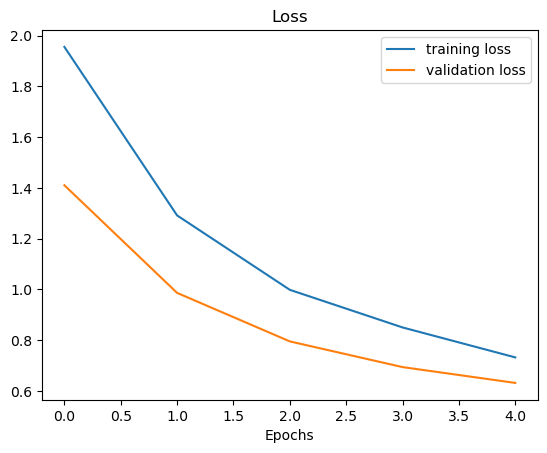

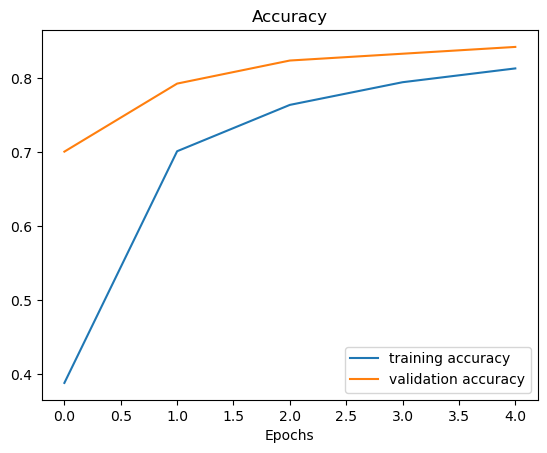

In [ ]:
plot_loss_curves(history_10_percent_data_aug_2)

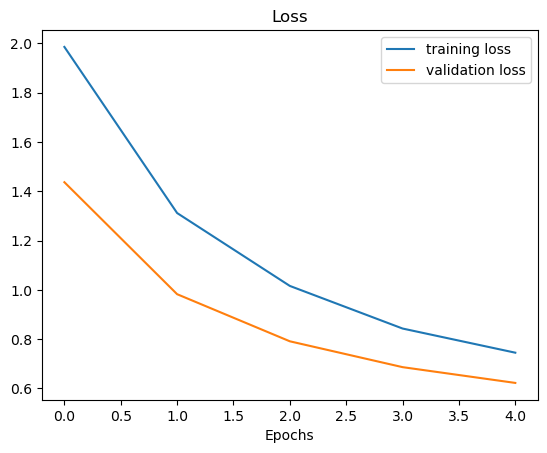

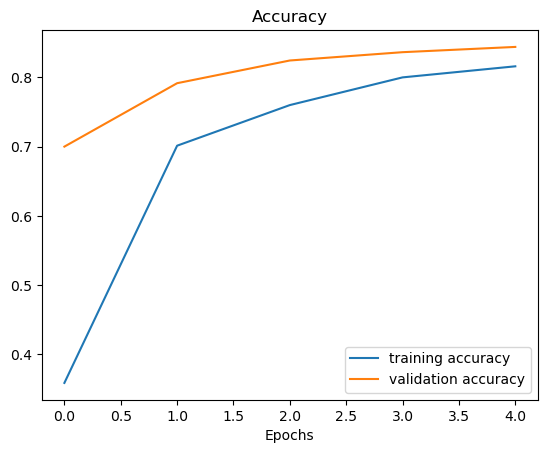

In [ ]:
plot_loss_curves(history_10_percent_data_aug_seq)

#### 2. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs.

In [ ]:
model_5_1.layers

In [ ]:
model_5_data_aug_seq.layers

In [ ]:
for layer in model_5_data_aug_seq.layers:
    print(layer.trainable)

True
True
False
True
True


In [ ]:
model_5_data_aug_seq.summary()

Model: "EffNetB0_dataaug_FE_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,

In [ ]:
print(len(model_5_data_aug_seq.layers[2].trainable_variables))

0


In [ ]:
print(len(base_model.trainable_variables))

0


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 tf.math.truediv_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

##### Trainable Base Layer

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

model_5_data_aug_seq.compile(loss="categorical_crossentropy",
                             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                             metrics=["accuracy"])

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 tf.math.truediv_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
print(len(model_5_data_aug_seq.trainable_variables))

21


##### Model Training

In [ ]:
fine_tune_epochs = initial_epochs + 10

history_fine_10p_data_aug_seq = model_5_data_aug_seq.fit(train_data,
                                                         epochs=fine_tune_epochs,
                                                         validation_data = test_data,
                                                         initial_epoch=history_10_percent_data_aug_seq.epoch[-1],
                                                         validation_steps=int(0.25 * len(test_data)),
                                                         callbacks=[create_tensorboard_callback("tensorflow_hub", "10p_finetune"), create_model_checkpoint(model_5_data_aug_seq.name, monitor="val_accuracy")])

Saving TensorBoard log files to: 10p_finetune/tensorflow_hub/20230615-022643
Epoch 5/15
24/24 [==============================] - ETA: 0s - loss: 0.5944 - accuracy: 0.8280
Epoch 5: val_accuracy improved from -inf to 0.82237, saving model to model_checkpoints\EffNetB0_dataaug_FE_1


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


24/24 [==============================] - 50s 2s/step - loss: 0.5944 - accuracy: 0.8280 - val_loss: 0.5184 - val_accuracy: 0.8224
Epoch 6/15
24/24 [==============================] - ETA: 0s - loss: 0.4617 - accuracy: 0.8547
Epoch 6: val_accuracy did not improve from 0.82237
24/24 [==============================] - 6s 240ms/step - loss: 0.4617 - accuracy: 0.8547 - val_loss: 0.6625 - val_accuracy: 0.7681
Epoch 7/15
24/24 [==============================] - ETA: 0s - loss: 0.3821 - accuracy: 0.8947
Epoch 7: val_accuracy did not improve from 0.82237
24/24 [==============================] - 6s 261ms/step - loss: 0.3821 - accuracy: 0.8947 - val_loss: 0.5542 - val_accuracy: 0.8174
Epoch 8/15
24/24 [==============================] - ETA: 0s - loss: 0.3376 - accuracy: 0.9000
Epoch 8: val_accuracy did not improve from 0.82237
24/24 [==============================] - 5s 203ms/step - loss: 0.3376 - accuracy: 0.9000 - val_loss: 0.5395 - val_accuracy: 0.8207
Epoch 9/15
24/24 [=========================

INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


24/24 [==============================] - 41s 2s/step - loss: 0.1915 - accuracy: 0.9493 - val_loss: 0.4678 - val_accuracy: 0.8470
Epoch 12/15
24/24 [==============================] - ETA: 0s - loss: 0.1777 - accuracy: 0.9573
Epoch 12: val_accuracy did not improve from 0.84704
24/24 [==============================] - 5s 203ms/step - loss: 0.1777 - accuracy: 0.9573 - val_loss: 0.6155 - val_accuracy: 0.7911
Epoch 13/15
24/24 [==============================] - ETA: 0s - loss: 0.1411 - accuracy: 0.9720
Epoch 13: val_accuracy did not improve from 0.84704
24/24 [==============================] - 5s 228ms/step - loss: 0.1411 - accuracy: 0.9720 - val_loss: 0.5186 - val_accuracy: 0.8289
Epoch 14/15
24/24 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9707
Epoch 14: val_accuracy did not improve from 0.84704
24/24 [==============================] - 5s 204ms/step - loss: 0.1229 - accuracy: 0.9707 - val_loss: 0.5463 - val_accuracy: 0.8306
Epoch 15/15
24/24 [==================

##### Evaluation

In [ ]:
results_5_fine_tune = model_5_data_aug_seq.evaluate(test_data)

79/79 [==============================] - 4s 49ms/step - loss: 0.4329 - accuracy: 0.8600


In [ ]:
def compare_histories(original_hist, new_hist, initial_epochs=5):
    """
    Compares two model history objects
    """
    #get original history measurements

    acc = original_hist.history["accuracy"]
    loss = original_hist.history["loss"]

    print(len(acc))

    val_acc = original_hist.history["val_accuracy"]
    val_loss = original_hist.history["val_loss"]

    # combine original history with new history

    total_acc = acc + new_hist.history["accuracy"]
    total_loss = loss + new_hist.history["loss"]

    total_val_acc = val_acc + new_hist.history["val_accuracy"]
    total_val_loss = val_loss + new_hist.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # make plots
    plt.figure(figsize=(15, 15))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label="Training Accuracy")
    plt.plot(total_val_acc, label="Validation Accuracy")
    plt.plot([initial_epochs-1, initial_epochs-1],
             plt.ylim(), label="Start Fine Tuning")
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label="Training Loss")
    plt.plot(total_val_loss, label="Validation Loss")
    plt.plot([initial_epochs-1, initial_epochs-1],
             plt.ylim(), label="Start Fine Tuning")
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss")
    plt.xlabel("epoch")
    plt.show();

##### History Comparison

5
16
[0.35866665840148926, 0.7013333439826965, 0.7599999904632568, 0.800000011920929, 0.8159999847412109, 0.828000009059906, 0.8546666502952576, 0.8946666717529297, 0.8999999761581421, 0.9213333129882812, 0.9319999814033508, 0.9493333101272583, 0.9573333263397217, 0.972000002861023, 0.9706666469573975, 0.9679999947547913]


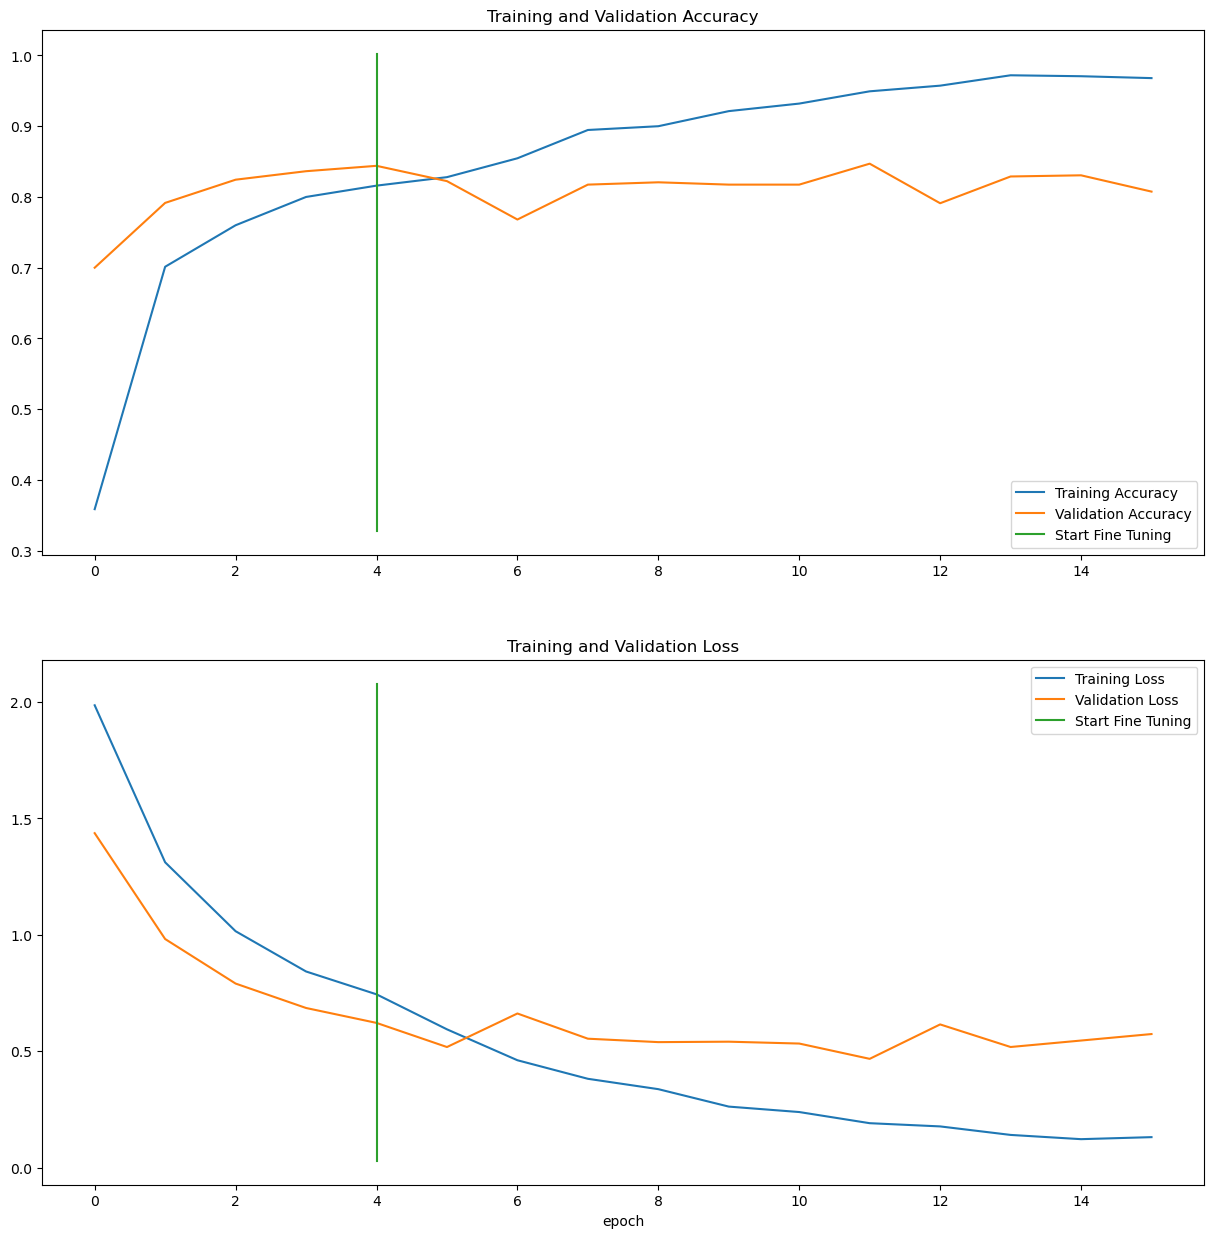

In [ ]:
compare_histories(history_10_percent_data_aug_seq, history_fine_10p_data_aug_seq)

#### 3. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs.

In [ ]:
model_5_data_aug_seq.layers[2].trainable

False

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 tf.math.truediv_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

##### Trainable Base Layer

In [ ]:
base_model.trainable=True

for layer in base_model.layers[:-30]:
    layer.trainable=False

model_5_data_aug_seq.compile(optimizer=tf.keras.optimizers.Adam(),
                             loss="categorical_crossentropy",
                             metrics=["accuracy"])

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 tf.math.truediv_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

##### Model Training

In [ ]:
fine_tune_epoch = initial_epochs + 10

history_fine_10p_data_aug_seq_30 = model_5_data_aug_seq.fit(train_data,
                                                            epochs=fine_tune_epochs,
                                                            validation_data=test_data,
                                                            initial_epoch=history_10_percent_data_aug_seq.epoch[-1],
                                                            validation_steps=int(0.25 * len(test_data)),
                                                            callbacks=[create_tensorboard_callback("tensorflow_hub", "10p_finetune_30l"), create_model_checkpoint(model_5_data_aug_seq.name, monitor="val_accuracy")])

Saving TensorBoard log files to: 10p_finetune_30l/tensorflow_hub/20230615-025337
Epoch 5/15
24/24 [==============================] - ETA: 0s - loss: 0.7335 - accuracy: 0.7560
Epoch 5: val_accuracy improved from -inf to 0.89803, saving model to model_checkpoints\EffNetB0_dataaug_FE_1


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_dataaug_FE_1\assets


24/24 [==============================] - 48s 2s/step - loss: 0.7335 - accuracy: 0.7560 - val_loss: 0.3488 - val_accuracy: 0.8980
Epoch 6/15
24/24 [==============================] - ETA: 0s - loss: 0.3091 - accuracy: 0.9013
Epoch 6: val_accuracy did not improve from 0.89803
24/24 [==============================] - 5s 205ms/step - loss: 0.3091 - accuracy: 0.9013 - val_loss: 0.7409 - val_accuracy: 0.7747
Epoch 7/15
24/24 [==============================] - ETA: 0s - loss: 0.2408 - accuracy: 0.9213
Epoch 7: val_accuracy did not improve from 0.89803
24/24 [==============================] - 5s 181ms/step - loss: 0.2408 - accuracy: 0.9213 - val_loss: 0.6495 - val_accuracy: 0.8207
Epoch 8/15
24/24 [==============================] - ETA: 0s - loss: 0.1569 - accuracy: 0.9547
Epoch 8: val_accuracy did not improve from 0.89803
24/24 [==============================] - 5s 191ms/step - loss: 0.1569 - accuracy: 0.9547 - val_loss: 0.3876 - val_accuracy: 0.8882
Epoch 9/15
24/24 [=========================

##### Evaluation

In [ ]:
results_5_fine_tune_30 = model_5_data_aug_seq.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 0.6399 - accuracy: 0.8564


##### History Comparison

5
16
[0.3386666774749756, 0.6959999799728394, 0.7799999713897705, 0.800000011920929, 0.8266666531562805, 0.7559999823570251, 0.9013333320617676, 0.9213333129882812, 0.9546666741371155, 0.9613333344459534, 0.9826666712760925, 0.9866666793823242, 0.9800000190734863, 0.972000002861023, 0.9879999756813049, 0.984000027179718]


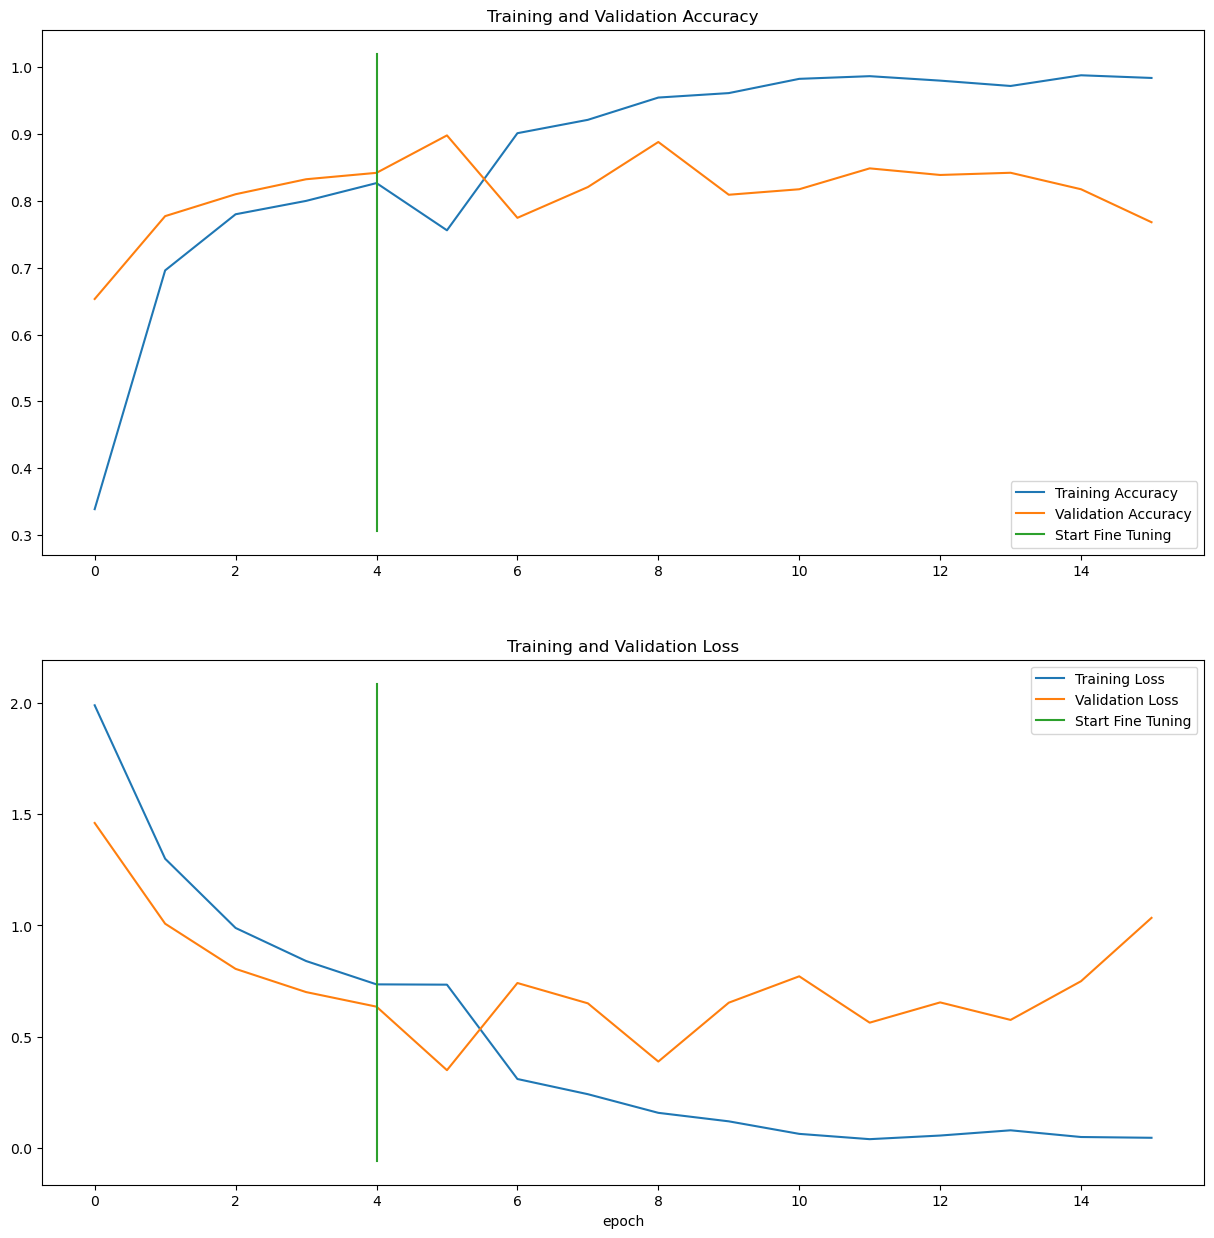

In [ ]:
compare_histories(history_10_percent_data_aug_seq, history_fine_10p_data_aug_seq_30)

####  Function To Visualize An Image And Make A Prediction

In [ ]:
test_dir

'10_food_classes_10_percent/test/'

In [ ]:
data_dir = pathlib.Path("10_food_classes_10_percent/test/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
import random

In [ ]:
def pick_predict(model, test_folder, range_num=3, img_shape=224, channels=3, rescale=False):
    """
    selects range_num random images from test data
    reads images from filenames, turns them into tensor
    reshapes them to (img_shape, img_shape, channels)
    plots the images with prediction class and prediction probability
    """

    for i in range(range_num):
        category = random.choice(os.listdir(test_folder))
        image_file = random.choice(os.listdir(test_folder + "/" + category))
        img = tf.io.read_file(test_folder + "/" + category + "/" + image_file)
        img = tf.image.decode_image(img, channels=channels)
        img = tf.image.resize(img, size=[img_shape, img_shape])
        # if rescale == True:
        # img = img/255
        pred = model.predict(tf.expand_dims(img, axis=0))

        pred_class=class_names[pred.argmax()]
        # print(img)

        plt.figure()
        plt.imshow(img/255)
        plt.title(f"Predicted class:{pred_class}\nProbability: {pred.max()}\nTrue class: {category}")
        plt.show();
        print(pred)

1/1 [==============================] - 0s 28ms/step


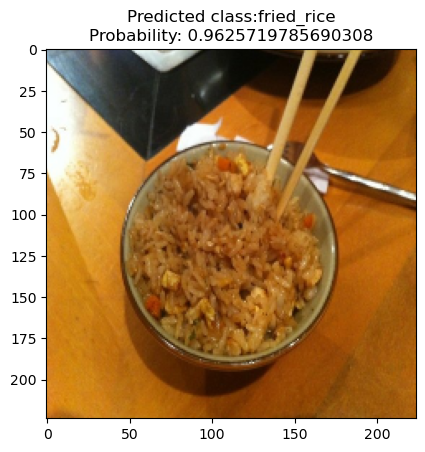

[[3.6615632e-02 1.9629284e-05 9.6257198e-01 1.8555419e-06 4.7372264e-06
  2.7874068e-04 2.2345181e-05 1.2536836e-04 9.1613838e-05 2.6812748e-04]]
1/1 [==============================] - 0s 28ms/step


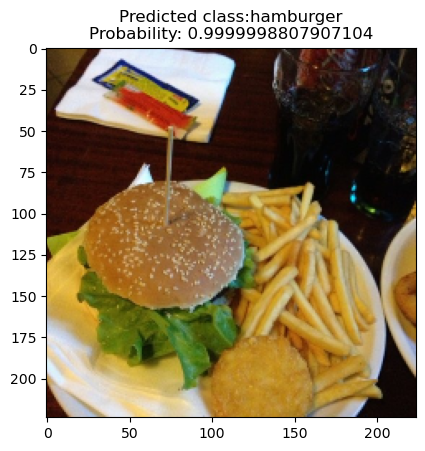

[[1.0471389e-09 5.2252988e-13 6.5719036e-10 4.6725307e-10 9.9999988e-01
  3.7609041e-11 9.8128408e-14 1.8449866e-12 9.5027460e-08 2.8188062e-12]]
1/1 [==============================] - 0s 31ms/step


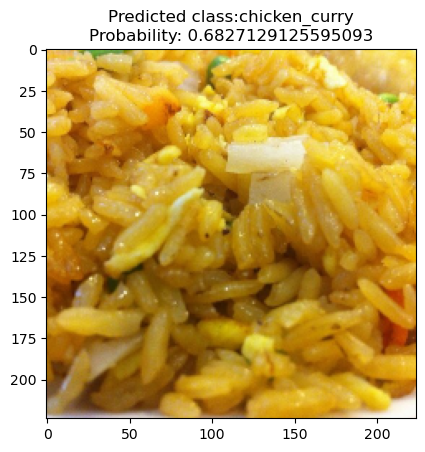

[[6.8271291e-01 4.3399158e-04 2.9903129e-01 9.0086395e-03 6.1042411e-03
  1.9173039e-03 1.9180140e-06 2.9458038e-06 3.0093716e-04 4.8574910e-04]]


In [ ]:
pick_predict(model_5_data_aug_seq, test_dir)

## 06. Transfer Learning in TensorFlow Part 3: Scaling-Up Exercises

### Tasks

1. Take 3 of your own photos of food and use the trained model to make predictions on them, share your predictions with the other students in Discord and show off your Food Vision model 🍔👁.
2. Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?
3. Recreate the first model (the feature extraction model) with mixed_precision turned on.

In [ ]:
import os
import sys
import pathlib
import random
import datetime

import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
if 'google.colab' in sys.modules:
    print("This Notebook is running in Google Colab\n")
    local = False
    if os.path.isdir("/content/drive/MyDrive/TF_sources"):
        print("Connected to Google Drive through Google Colab\n")
        runtime = 3
        %cd /content/drive/MyDrive/TF_sources
        %ls
else:
    print("This Notebook is connected to a local runtime\n")
    local = True
    if os.path.isdir("C:\\Users\\ikuma\\OneDrive\\python\\datascience\\ZTM_Tensorflow"):
        print("Connected to native Windows Jupyter runtime\n")
        runtime = 1
        %cd C:\Users\ikuma\OneDrive\python\datascience\ZTM_Tensorflow\
        %ls
    elif os.path.isdir("/tf_gpu/ZTM_Tensorflow/"):
        print("Connected to WSL2 Docker Jupyter runtime\n")
        runtime = 2
        %cd /tf_gpu/ZTM_Tensorflow/
        %ls
    else:
        print(".")

This Notebook is connected to a local runtime

Connected to WSL2 Docker Jupyter runtime

/tf_gpu/ZTM_Tensorflow
07_food_vision_milestone_project1.ipynb*  NLP_TF/         helper_functions.py*
101_food_classes_10_percent/              __pycache__/    model_checkpoints/
10_food_classes_10_percent/               cameras/        saved_models/
10_food_classes_all_data/                 catboost_info/  tensorboard_data/
10p_finetune/                             custom/
10p_finetune_30l/                         effiNetB0_10p/


#### 1. Make Predictions On 3 Own Photos Of Food

#### 2. Feature-Extraction Transfer Learning Model 10 Epochs & Compare With Feature Extraction 5 Epochs And Fine-Tuning For 5 epochs

##### Directory

In [ ]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test"

In [ ]:
data_dir = pathlib.Path(test_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
len(class_names), class_names

(101,
 array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
        'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
        'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
        'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche',
        'cheese_plate', 'cheesecake', 'chicken_curry',
        'chicken_quesadilla', 'chicken_wings', 'chocolate_cake',
        'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich',
        'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes',
        'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict',
        'escargots', 'falafel', 'filet_mignon', 'fish_and_chips',
        'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast',
        'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread',
        'gnocchi', 'greek_salad', 'grilled_cheese_sandwich',
        'grilled_salmon', 'guacamole', 'gyoza', 'hamburger',
        'hot_and_sour_soup', 'hot_dog', 'huevos_ranchero

In [ ]:
for dirpath, dirname, filename in os.walk("101_food_classes_10_percent"):
    print(f"There are {len(dirname)} directories and {len(filename)} image in {dirpath}")

There are 2 directories and 0 image in 101_food_classes_10_percent
There are 101 directories and 0 image in 101_food_classes_10_percent/test
There are 0 directories and 250 image in 101_food_classes_10_percent/test/apple_pie
There are 0 directories and 250 image in 101_food_classes_10_percent/test/baby_back_ribs
There are 0 directories and 250 image in 101_food_classes_10_percent/test/baklava
There are 0 directories and 250 image in 101_food_classes_10_percent/test/beef_carpaccio
There are 0 directories and 250 image in 101_food_classes_10_percent/test/beef_tartare
There are 0 directories and 250 image in 101_food_classes_10_percent/test/beet_salad
There are 0 directories and 250 image in 101_food_classes_10_percent/test/beignets
There are 0 directories and 250 image in 101_food_classes_10_percent/test/bibimbap
There are 0 directories and 250 image in 101_food_classes_10_percent/test/bread_pudding
There are 0 directories and 250 image in 101_food_classes_10_percent/test/breakfast_burri

In [ ]:
custom_dir = "custom/"

In [ ]:
for item in os.listdir(custom_dir):
    image_file = custom_dir + item

    img = tf.io.read_file(image_file)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, [224, 224])

    pred = model_5_data_aug_seq.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[pred.argmax()]

    plt.figure()
    plt.imshow(img/255)
    plt.title(f"Predicted class: {pred_class}\nProbability:{pred.max()}")
    plt.show()
    print(pred)

2023-07-14 11:39:32.898715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-14 11:39:32.989869: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-14 11:39:32.990346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-14 11:39:33.011160: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-14 11:39:33.011586: I tensorflow/compile

NameError: ignored

##### Classes

##### Datasets

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

print("train images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               class_mode="categorical",
                                               batch_size=BATCH_SIZE)

print("test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SIZE,
                                             class_mode="categorical",
                                             batch_size=BATCH_SIZE)

train images:
Found 7575 images belonging to 101 classes.
test images:
Found 25250 images belonging to 101 classes.


In [ ]:
for _ in range(2):
    img, label = train_data.next()
    print(img.shape)
    plt.figure()
    plt.imshow(img[0]/255)
    plt.show();

AttributeError: ignored

In [ ]:
print("Train images:")
train_data_2 = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMAGE_SIZE)

print("Test images:")
test_data_2 = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMAGE_SIZE,
                                                                shuffle=False)

Train images:
Found 7575 files belonging to 101 classes.
Test images:
Found 25250 files belonging to 101 classes.


##### Callback Functions

In [ ]:
def create_tensorboard_callback(experiment_name, dir_name="tensorboard_data"):
    """
    creates tensorboard data and saves it to dir_name/experiment_name/timestamp
    """
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"saving TensorBoard data to {log_dir}")
    return tensorboard_callback

def create_model_checkpoint(model_name, monitor="val_loss", save_path="model_checkpoints"):
    """
    returns tensorflow model checkpoint monitoring monitor
    with filepath set to save_path/model_name
    """
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor=monitor,
                                              verbose=1,
                                              save_best_only=True,
                                              save_weights_only=True)

##### Model Creation

In [ ]:
IMAGE_SHAPE = IMAGE_SIZE + (3,)

from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name="data_augmentation")

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=IMAGE_SHAPE, name="input_layer")

x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_6_1 = tf.keras.Model(inputs, outputs, name="EffNetV2B0_101FE_10e")

In [ ]:
model_6_1.summary()

Model: "EffNetV2B0_101FE_10e"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                              

##### Model Training

In [ ]:
model_6_1.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

history_6_1 = model_6_1.fit(train_data,
                            epochs=4,
                            validation_data=test_data,
                            validation_steps=int(0.15 * len(test_data)),
                            callbacks=[create_model_checkpoint(model_6_1.name, monitor="val_accuracy"), create_tensorboard_callback("EffNetV2B0_101food_10p")])

saving TensorBoard data to tensorboard_data/EffNetV2B0_101food_10p/20230714-125634
Epoch 1/4


2023-07-14 12:56:34.451208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


237/237 [==============================] - ETA: 0s - loss: 3.5306 - accuracy: 0.2380

2023-07-14 12:57:36.519636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.45922, saving model to model_checkpoints/EffNetV2B0_101FE_10e
237/237 [==============================] - 95s 373ms/step - loss: 3.5306 - accuracy: 0.2380 - val_loss: 2.4701 - val_accuracy: 0.4592
Epoch 2/4
237/237 [==============================] - ETA: 0s - loss: 2.4331 - accuracy: 0.4451
Epoch 2: val_accuracy improved from 0.45922 to 0.51245, saving model to model_checkpoints/EffNetV2B0_101FE_10e
237/237 [==============================] - 84s 355ms/step - loss: 2.4331 - accuracy: 0.4451 - val_loss: 1.9947 - val_accuracy: 0.5124
Epoch 3/4
237/237 [==============================] - ETA: 0s - loss: 2.0487 - accuracy: 0.5127
Epoch 3: val_accuracy improved from 0.51245 to 0.54078, saving model to model_checkpoints/EffNetV2B0_101FE_10e
237/237 [==============================] - 82s 346ms/step - loss: 2.0487 - accuracy: 0.5127 - val_loss: 1.8189 - val_accuracy: 0.5408
Epoch 4/4
237/237 [==============================] - ETA: 0s - loss: 1.8401 -

In [ ]:
model_6_1_loaded = tf.keras.models.load_model("model_checkpoints/model_20")

In [ ]:
times_ds_from_dir = [[116, 73, 62, 57],
                     [47, 37, 40, 34],
                     [43, 32, 29, 28],
                     [35, 28, 28, 28],
                     [33, 30, 25, 25]]
times_dg_flow_from_dir = [[107, 96, 93, 93],
                          [97, 88, 87, 89],
                          [93, 84, 83, 86],
                          [90, 80, 82, 80],
                          [95, 84, 82, 81]]

In [ ]:
results_6_1_loaded = model_6_1_loaded.evaluate(test_data)

790/790 [==============================] - 90s 113ms/step - loss: 1.5418 - accuracy: 0.5908


In [ ]:
results_6_1 = model_6_1.evaluate(test_data_2)

790/790 [==============================] - 55s 69ms/step - loss: 1.5057 - accuracy: 0.5977


##### Model Creation Feature Extraction 5 Epochs

In [ ]:
base_model_2 = tf.keras.applications.efficientnet.EfficientNetV2B0(include_top=False)
base_model_2.trainable = False

inputs_2 = layers.Input(shape=IMAGE_SHAPE, name="input_layer")
x = data_augmentation(inputs_2)
x = base_model_2(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs_2 = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_6_1a = tf.keras.Model(inputs_2, outputs_2, name="EffNetV2B0_101FE_5e")

In [ ]:
model_6_1a.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

In [ ]:
history_6_1a = model_6_1a.fit(train_data_2,
                             epochs=5,
                             validation_data=test_data_2,
                             validation_steps=int(0.15 * len(test_data_2)),
                             callbacks=[create_model_checkpoint(model_6_1a.name,monitor="val_accuracy"), create_tensorboard_callback("EffNetV2B0_101FE_5e")])

saving TensorBoard data to tensorboard_data/EffNetB0_101FE_5e/20230615-030828
Epoch 1/5
237/237 [==============================] - ETA: 0s - loss: 3.3839 - accuracy: 0.2702
Epoch 1: val_accuracy improved from -inf to 0.45445, saving model to model_checkpoints\EffNetB0_101FE_5e


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


237/237 [==============================] - 83s 311ms/step - loss: 3.3839 - accuracy: 0.2702 - val_loss: 2.5303 - val_accuracy: 0.4544
Epoch 2/5
237/237 [==============================] - ETA: 0s - loss: 2.2088 - accuracy: 0.4960
Epoch 2: val_accuracy improved from 0.45445 to 0.51192, saving model to model_checkpoints\EffNetB0_101FE_5e


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


237/237 [==============================] - 69s 291ms/step - loss: 2.2088 - accuracy: 0.4960 - val_loss: 2.0566 - val_accuracy: 0.5119
Epoch 3/5
237/237 [==============================] - ETA: 0s - loss: 1.8142 - accuracy: 0.5702
Epoch 3: val_accuracy improved from 0.51192 to 0.52569, saving model to model_checkpoints\EffNetB0_101FE_5e


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


237/237 [==============================] - 76s 318ms/step - loss: 1.8142 - accuracy: 0.5702 - val_loss: 1.9208 - val_accuracy: 0.5257
Epoch 4/5
237/237 [==============================] - ETA: 0s - loss: 1.5991 - accuracy: 0.6108
Epoch 4: val_accuracy improved from 0.52569 to 0.54343, saving model to model_checkpoints\EffNetB0_101FE_5e


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


237/237 [==============================] - 71s 297ms/step - loss: 1.5991 - accuracy: 0.6108 - val_loss: 1.8164 - val_accuracy: 0.5434
Epoch 5/5
237/237 [==============================] - ETA: 0s - loss: 1.4454 - accuracy: 0.6504
Epoch 5: val_accuracy improved from 0.54343 to 0.54635, saving model to model_checkpoints\EffNetB0_101FE_5e


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


237/237 [==============================] - 68s 286ms/step - loss: 1.4454 - accuracy: 0.6504 - val_loss: 1.7837 - val_accuracy: 0.5463


In [ ]:
np.array(history_6_1a.history["val_accuracy"]).max()

0.5722987055778503

In [ ]:
np.array(history_6_1.history["val_accuracy"]).max()

0.5956038236618042

Training on 10 epochs seems to yield a bit more than 2% accuracy over 5 epochs on the 101 class dataset.

##### Model Creation Fine Tuning 5 Epochs

In [ ]:
for layer in base_model_2.layers[:-5]:
    layer.trainable = False

In [ ]:
for k, layer in enumerate(base_model_2.layers):
    print(k, layer.name, layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 tf.math.truediv_4 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
fine_tune_epochs = 10

history_6_1a = model_6_1a.fit(train_data_2,
                              epochs=fine_tune_epochs,
                              validation_data=test_data_2,
                              validation_steps=int(0.15 * len(test_data_2)),
                              initial_epoch=history_6_1a.epoch[-1],
                              callbacks=[create_model_checkpoint(model_6_1a.name, monitor="val_accuracy"), create_tensorboard_callback("EffNetV2B0_101FE_FT_10p")])

saving TensorBoard data to tensorboard_data/EffNetB0_101FE_FT_10p/20230615-031521
Epoch 5/10
237/237 [==============================] - ETA: 0s - loss: 1.2299 - accuracy: 0.6995
Epoch 5: val_accuracy improved from -inf to 0.55429, saving model to model_checkpoints\EffNetB0_101FE_5e


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


237/237 [==============================] - 69s 288ms/step - loss: 1.2299 - accuracy: 0.6995 - val_loss: 1.7277 - val_accuracy: 0.5543
Epoch 6/10
237/237 [==============================] - ETA: 0s - loss: 1.1486 - accuracy: 0.7189
Epoch 6: val_accuracy improved from 0.55429 to 0.56382, saving model to model_checkpoints\EffNetB0_101FE_5e


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FE_5e\assets


237/237 [==============================] - 69s 293ms/step - loss: 1.1486 - accuracy: 0.7189 - val_loss: 1.7008 - val_accuracy: 0.5638
Epoch 7/10
237/237 [==============================] - ETA: 0s - loss: 1.0731 - accuracy: 0.7370
Epoch 7: val_accuracy did not improve from 0.56382
237/237 [==============================] - 30s 126ms/step - loss: 1.0731 - accuracy: 0.7370 - val_loss: 1.7277 - val_accuracy: 0.5527
Epoch 8/10
237/237 [==============================] - ETA: 0s - loss: 1.0111 - accuracy: 0.7516
Epoch 8: val_accuracy did not improve from 0.56382
237/237 [==============================] - 29s 123ms/step - loss: 1.0111 - accuracy: 0.7516 - val_loss: 1.7376 - val_accuracy: 0.5445
Epoch 9/10
237/237 [==============================] - ETA: 0s - loss: 0.9481 - accuracy: 0.7700
Epoch 9: val_accuracy did not improve from 0.56382
237/237 [==============================] - 28s 119ms/step - loss: 0.9481 - accuracy: 0.7700 - val_loss: 1.7060 - val_accuracy: 0.5546
Epoch 10/10
237/237 [==

In [ ]:
model_6_1a_loaded = tf.keras.models.load_model("model_checkpoints/EffNetV2B0_101FE_5e")

In [ ]:
results_6_1a_loaded = model_6_1a_loaded.evaluate(test_data_2)

790/790 [==============================] - 56s 69ms/step - loss: 1.5188 - accuracy: 0.5958


In [ ]:
results_6_1a = model_6_1a.evaluate(test_data_2)

790/790 [==============================] - 49s 61ms/step - loss: 1.5160 - accuracy: 0.5945


In [ ]:
print(f'10 epoch Feature Extraction only:\nmax accuracy on 15% test data: {np.array(history_6_1.history["val_accuracy"]).max()}\nmax accuracy on full test data: {results_6_1[1]}')

10 epoch Feature Extraction only:
max accuracy on 15% test data: 0.5566737055778503
max accuracy on full test data: 0.5960000157356262


In [ ]:
print(f'5 epoch FE & 5 epoch Fine Tuning\nmax accuracy on 15% test data: {np.array(history_6_1a.history["val_accuracy"]).max()}\nmax accuracy on full test data: {results_6_1a[1]}')

5 epoch FE & 5 epoch Fine Tuning
max accuracy on 15% test data: 0.5638241767883301
max accuracy on full test data: 0.5945346355438232


the combined FE&FT model seems only marginally more accurate than the FE only model. Maybe fine tuning more layers could achieve better results

##### Model Creation FE 5 epochs #2

In [ ]:
base_model_3 = tf.keras.applications.efficientnet.EfficientNetV2B0(include_top=False)
base_model_3.trainable = False

In [ ]:
inputs_3 = layers.Input(shape=IMAGE_SHAPE, name="input_layer")

x = data_augmentation(inputs_3)
x = base_model_3(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs_3 = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_6_1b = tf.keras.Model(inputs_3, outputs_3, name="EffNetV2B0_101FEFT_10l")

In [ ]:
model_6_1b.compile(loss="categorical_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

In [ ]:
model_6_1b.summary()

Model: "EffNetB0_101FEFT_10l"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,

In [ ]:
history_6_1b = model_6_1b.fit(train_data_2,
                              epochs=5,
                              validation_data=test_data_2,
                              validation_steps=int(0.15 * len(test_data_2)),
                              callbacks=[create_model_checkpoint(model_6_1b.name, monitor="val_accuracy"), create_tensorboard_callback("EffNetB0_101FEFT_10lp1")])

saving TensorBoard data to tensorboard_data/EffNetB0_101FEFT_10lp1/20230614-040813
Epoch 1/5
237/237 [==============================] - ETA: 0s - loss: 3.3760 - accuracy: 0.2713
Epoch 1: val_accuracy improved from -inf to 0.47060, saving model to model_checkpoints\EffNetB0_101FEFT_10l


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


237/237 [==============================] - 69s 265ms/step - loss: 3.3760 - accuracy: 0.2713 - val_loss: 2.4558 - val_accuracy: 0.4706
Epoch 2/5
237/237 [==============================] - ETA: 0s - loss: 2.2081 - accuracy: 0.4973
Epoch 2: val_accuracy improved from 0.47060 to 0.52357, saving model to model_checkpoints\EffNetB0_101FEFT_10l


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


237/237 [==============================] - 63s 265ms/step - loss: 2.2081 - accuracy: 0.4973 - val_loss: 2.0159 - val_accuracy: 0.5236
Epoch 3/5
237/237 [==============================] - ETA: 0s - loss: 1.8265 - accuracy: 0.5648
Epoch 3: val_accuracy improved from 0.52357 to 0.53310, saving model to model_checkpoints\EffNetB0_101FEFT_10l


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


237/237 [==============================] - 63s 263ms/step - loss: 1.8265 - accuracy: 0.5648 - val_loss: 1.8797 - val_accuracy: 0.5331
Epoch 4/5
237/237 [==============================] - ETA: 0s - loss: 1.6047 - accuracy: 0.6090
Epoch 4: val_accuracy improved from 0.53310 to 0.53575, saving model to model_checkpoints\EffNetB0_101FEFT_10l


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


237/237 [==============================] - 91s 382ms/step - loss: 1.6047 - accuracy: 0.6090 - val_loss: 1.8097 - val_accuracy: 0.5358
Epoch 5/5
237/237 [==============================] - ETA: 0s - loss: 1.4506 - accuracy: 0.6420
Epoch 5: val_accuracy improved from 0.53575 to 0.54714, saving model to model_checkpoints\EffNetB0_101FEFT_10l


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


237/237 [==============================] - 68s 284ms/step - loss: 1.4506 - accuracy: 0.6420 - val_loss: 1.7568 - val_accuracy: 0.5471


In [ ]:
base_model_3.trainable=True
for layer in base_model_3.layers[:-15]:
    layer.trainable=False

In [ ]:
for k, layer in enumerate(base_model_3.layers):
    if layer.trainable==True:
        print(k, layer.name, layer.trainable)

223 block7a_expand_bn True
224 block7a_expand_activation True
225 block7a_dwconv True
226 block7a_bn True
227 block7a_activation True
228 block7a_se_squeeze True
229 block7a_se_reshape True
230 block7a_se_reduce True
231 block7a_se_expand True
232 block7a_se_excite True
233 block7a_project_conv True
234 block7a_project_bn True
235 top_conv True
236 top_bn True
237 top_activation True


In [ ]:
fine_tune_epochs = 10
history_6_1b2 = model_6_1b.fit(train_data_2,
                               epochs=fine_tune_epochs,
                               validation_data=test_data_2,
                               validation_steps=int(0.15 * len(test_data_2)),
                               initial_epoch=history_6_1b.epoch[-1],
                               callbacks=[create_model_checkpoint(model_6_1b.name, monitor="val_accuracy"), create_tensorboard_callback("EffNetB0_101FEFT_15lp2")])

saving TensorBoard data to tensorboard_data/EffNetB0_101FEFT_15lp2/20230614-041406
Epoch 5/10
237/237 [==============================] - ETA: 0s - loss: 1.3323 - accuracy: 0.6696
Epoch 5: val_accuracy improved from -inf to 0.56118, saving model to model_checkpoints\EffNetB0_101FEFT_10l


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


237/237 [==============================] - 66s 277ms/step - loss: 1.3323 - accuracy: 0.6696 - val_loss: 1.7025 - val_accuracy: 0.5612
Epoch 6/10
237/237 [==============================] - ETA: 0s - loss: 1.2357 - accuracy: 0.6947
Epoch 6: val_accuracy improved from 0.56118 to 0.56462, saving model to model_checkpoints\EffNetB0_101FEFT_10l


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


237/237 [==============================] - 64s 270ms/step - loss: 1.2357 - accuracy: 0.6947 - val_loss: 1.6879 - val_accuracy: 0.5646
Epoch 7/10
237/237 [==============================] - ETA: 0s - loss: 1.1536 - accuracy: 0.7098
Epoch 7: val_accuracy improved from 0.56462 to 0.57230, saving model to model_checkpoints\EffNetB0_101FEFT_10l


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


237/237 [==============================] - 62s 262ms/step - loss: 1.1536 - accuracy: 0.7098 - val_loss: 1.6515 - val_accuracy: 0.5723
Epoch 8/10
237/237 [==============================] - ETA: 0s - loss: 1.0756 - accuracy: 0.7311
Epoch 8: val_accuracy did not improve from 0.57230
237/237 [==============================] - 28s 118ms/step - loss: 1.0756 - accuracy: 0.7311 - val_loss: 1.6833 - val_accuracy: 0.5625
Epoch 9/10
237/237 [==============================] - ETA: 0s - loss: 1.0006 - accuracy: 0.7579
Epoch 9: val_accuracy did not improve from 0.57230
237/237 [==============================] - 29s 123ms/step - loss: 1.0006 - accuracy: 0.7579 - val_loss: 1.6541 - val_accuracy: 0.5715
Epoch 10/10
237/237 [==============================] - ETA: 0s - loss: 0.9326 - accuracy: 0.7769
Epoch 10: val_accuracy improved from 0.57230 to 0.57495, saving model to model_checkpoints\EffNetB0_101FEFT_10l


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


INFO:tensorflow:Assets written to: model_checkpoints\EffNetB0_101FEFT_10l\assets


237/237 [==============================] - 66s 280ms/step - loss: 0.9326 - accuracy: 0.7769 - val_loss: 1.6249 - val_accuracy: 0.5749


In [ ]:
results_6_1b = model_6_1b.evaluate(test_data)

790/790 [==============================] - 115s 143ms/step - loss: 1.5436 - accuracy: 0.5886


In [ ]:
print(f'10 epoch Feature Extraction only:\nmax accuracy on 15% test data: {np.array(history_6_1.history["val_accuracy"]).max()}\nmax accuracy on full test data: {results_6_1[1]}')

10 epoch Feature Extraction only:
max accuracy on 15% test data: 0.5728284120559692
max accuracy on full test data: 0.5986138582229614


In [ ]:
print(f'5 epoch FE & 5 epoch Fine Tuning\nmax accuracy on 15% test data: {np.array(history_6_1a.history["val_accuracy"]).max()}\nmax accuracy on full test data: {results_6_1a[1]}')

5 epoch FE & 5 epoch Fine Tuning
max accuracy on 15% test data: 0.5733580589294434
max accuracy on full test data: 0.5913267135620117


In [ ]:
print(f'5 epoch FE & 5 epoch Fine Tuning 15L:\nmax accuracy on 15% test data: {np.array(history_6_1b2.history["val_accuracy"]).max()}\nmax accuracy on full test data: {results_6_1b[1]}')

5 epoch FE & 5 epoch Fine Tuning 15L:
max accuracy on 15% test data: 0.5749470591545105
max accuracy on full test data: 0.5885544419288635


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

#### Feature Extraction With Mixed Precision On

In [ ]:
tf.__version__

'2.9.0'

In [ ]:
from tensorflow.keras import mixed_precision

In [ ]:
policy = mixed_precision.Policy("float32")
mixed_precision.set_global_policy(policy)

In [ ]:
print(f"Compute dtype: {policy.compute_dtype}")
print(f"Variable dtype: {policy.variable_dtype}")

Compute dtype: float32
Variable dtype: float32


In [ ]:
base_model_4 = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model_4.trainable = False

inputs = layers.Input(shape=(224, 224, 3))
x = base_model_4(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(10)(x)
outputs = layers.Activation("softmax", dtype=tf.float32)(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

TypeError: ignored

wont work with  tf 2.9*

base_model_4 = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)<br>
base_model_4.trainable = False

## 07. Milestone Project 1: 🍔👁 Food Vision Big™ Exercises

### Tasks

1. Use the same evaluation techniques on the large-scale Food Vision model as you did in the previous notebook (Transfer Learning Part 3: Scaling up). More specifically, it would be good to see:
* A confusion matrix between all of the model's predictions and true labels.
* A graph showing the f1-scores of each class.
* A visualization of the model making predictions on various images and comparing the predictions to the ground truth.
 * For example, plot a sample image from the test dataset and have the title of the plot show the prediction, the prediction probability and the ground truth label.
* Note: To compare predicted labels to test labels, it might be a good idea when loading the test data to set shuffle=False (so the ordering of test data is preserved alongside the order of predicted labels).
2. Take 3 of your own photos of food and use the Food Vision model to make predictions on them. How does it go? Share your images/predictions with the other students.
3. Retrain the model (feature extraction and fine-tuning) we trained in this notebook, except this time use EfficientNetB4 as the base model instead of EfficientNetB0. Do you notice an improvement in performance? Does it take longer to train? Are there any tradeoffs to consider?
4. Name one important benefit of mixed precision training, how does this benefit take place?

In [ ]:
import os
import pathlib
import random
import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


#### 1. Evaluation Of Food Vision Model

##### Prep Work

In [ ]:
y_labels = []
for images, labels in test_data_2.unbatch():
    y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
len(y_labels)

25250

In [ ]:
pred_probs = model_6_1.predict(test_data_2, verbose=1)

790/790 [==============================] - 48s 59ms/step


In [ ]:
len(pred_probs)

25250

In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
type(pred_probs)

numpy.ndarray

In [ ]:
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")
print(f"What prediction probability sample 0 looks like:\n{pred_probs[0]}")

Number of prediction probabilities for sample 0: 101
The class with the highest predicted probability by the model for sample 0: 2
What prediction probability sample 0 looks like:
[6.9997624e-02 5.9115927e-04 2.3246592e-01 1.3493213e-06 5.0762195e-05
 2.1874563e-05 3.2055477e-04 1.3376793e-05 2.1518499e-02 8.8855514e-04
 1.2342510e-05 1.6978058e-05 9.7432605e-04 2.6125142e-06 3.7909310e-02
 1.1054837e-03 1.3895736e-04 4.2288499e-03 1.0479184e-02 2.4700314e-05
 1.3014153e-03 7.9348203e-05 2.5095436e-04 1.5617102e-04 6.9085584e-04
 2.3545010e-03 2.5484581e-03 3.5571706e-05 8.5494667e-02 8.0726796e-04
 3.0071218e-05 4.9214954e-03 2.8843794e-04 5.5466335e-06 2.2970557e-02
 3.9740404e-05 7.8525627e-04 3.0826791e-03 8.2548037e-02 8.9988091e-05
 9.0261886e-04 9.5307110e-03 6.7730679e-04 4.3220614e-05 2.4820102e-04
 4.8212445e-05 7.2414931e-03 3.9163639e-05 4.6771661e-06 4.5524847e-02
 2.0949513e-04 2.3803406e-04 6.4066932e-02 3.7208203e-02 1.1467039e-04
 1.3131356e-02 2.7855057e-02 4.9282825e

In [ ]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([ 2,  0,  0,  8,  8, 78, 29, 46,  2,  0], dtype=int64)

##### Confusion Matrix

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=15, norm=False, savefig=False):
    """
        creates a labelled confusion matrix comparing preds and ground truth labels.

        if classes is passed, confusion matrix will be labelled, if not, integer class values will be used.

        args:
            y_true: array of truth labels (must be same shape as y_pred)
            y_pred: array of predicted labels (must be same shape as y_true)
            classes: array of class labels (e.g. string form), if 'None', integer labels are used.
            figsize: size of output figure (default=(20, 20))
            text_size: size of output figure text (default=15)
            norm: normalize values or not (default=False)
            savefig: save confusion matrix to file (default=False)

        returns:
            a labelled confusion matrix plot comparing y_true and y_pred

        example usage:
            make_confusion_matrix(y_true=test_labels,
                                  y_pred=y_preds,
                                  classes=class_names,
                                  figsize=(15, 15),
                                  text_size=10)
    """
    # create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]    # normalize it
    n_classes = cm.shape[0]     # find the number of classes we're dealing with

    # plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)     # colors will represent how correct a class is
    fig.colorbar(cax)

    # is there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # rotate xticks for readability & increase font size
    plt.xticks(rotation=70, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                     horizontalalignment="center",
                     color="white" if cm[i,j] > threshold else "black",
                     size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
                     horizontalalignment="center",
                     color="white" if cm[i,j] > threshold else "black",
                     size=text_size)

    # save the figure if savefig
    if savefig:
        fig.savefig("confusion_matrix.png")

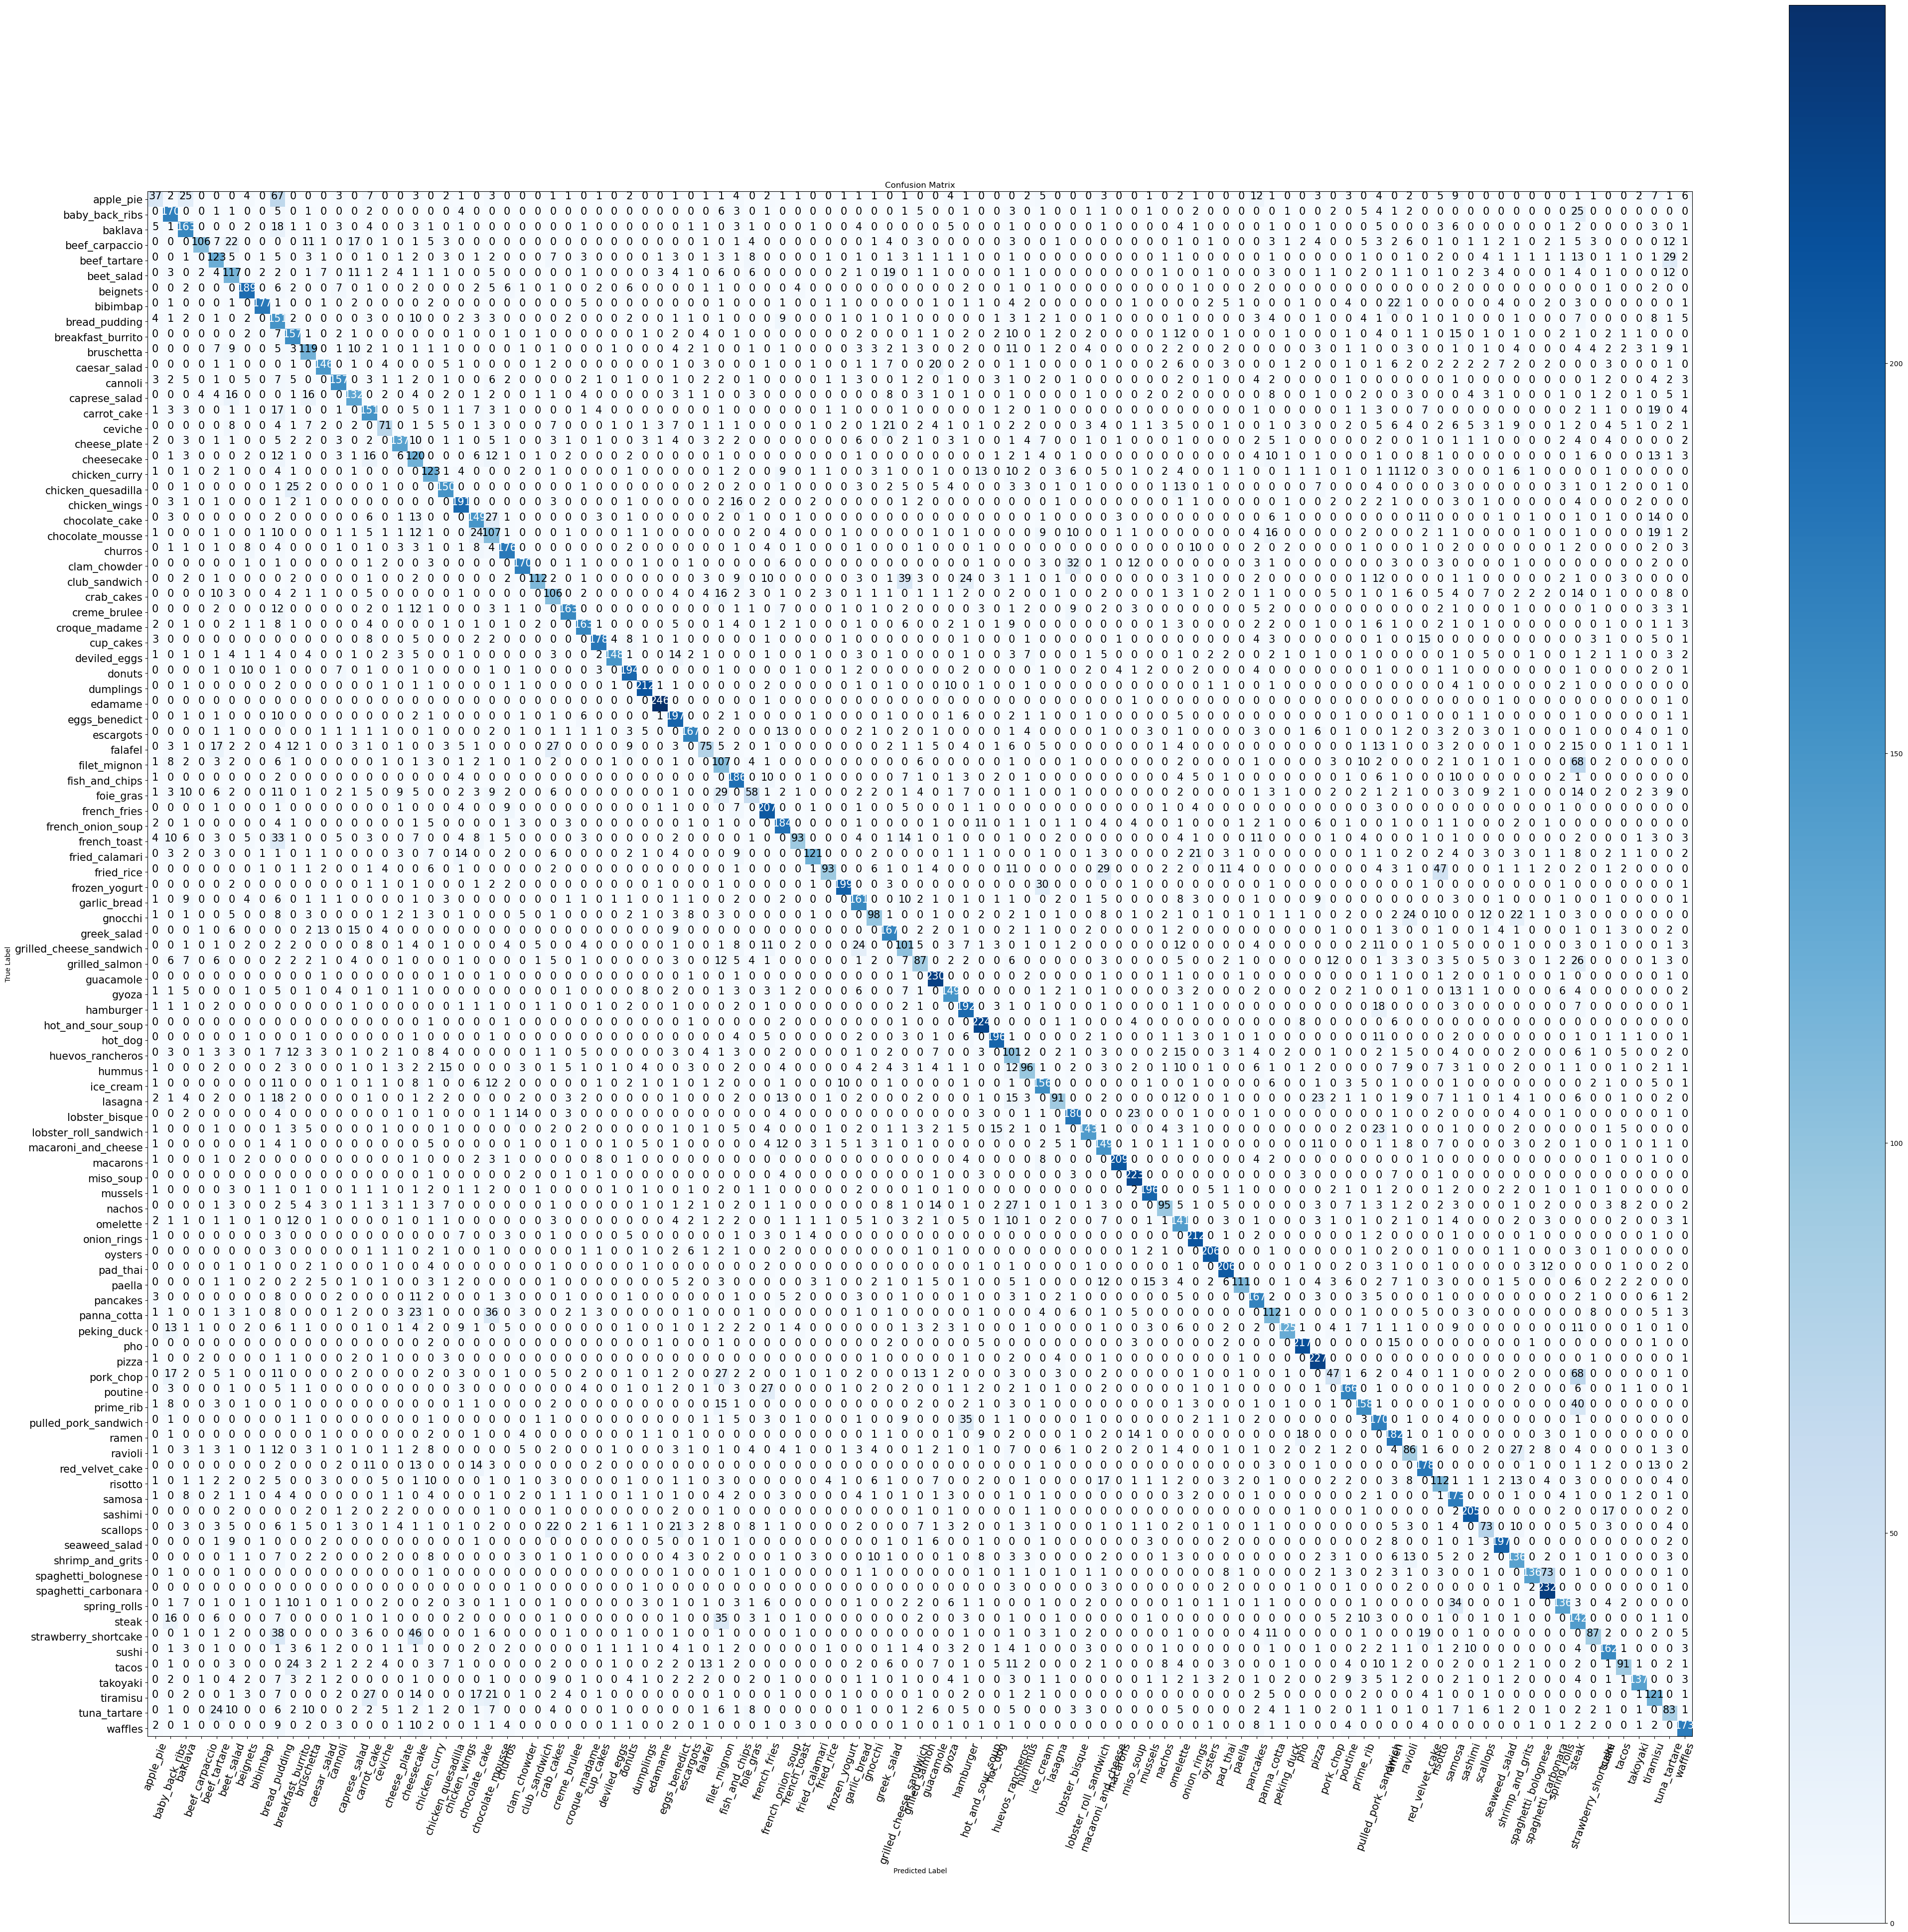

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      figsize=(50,50),
                      classes=class_names.tolist())

##### F1-Scores Graph

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.39      0.15      0.21       250
           1       0.57      0.68      0.62       250
           2       0.54      0.65      0.59       250
           3       0.88      0.42      0.57       250
           4       0.44      0.49      0.47       250
           5       0.43      0.47      0.45       250
           6       0.74      0.76      0.75       250
           7       0.90      0.71      0.79       250
           8       0.23      0.60      0.33       250
           9       0.49      0.63      0.55       250
          10       0.50      0.48      0.49       250
          11       0.71      0.58      0.64       250
          12       0.71      0.63      0.67       250
          13       0.57      0.53      0.55       250
          14       0.50      0.60      0.55       250
          15       0.51      0.28      0.37       250
          16       0.69      0.55      0.61       250
          17       0.31    

In [ ]:
class_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
class_report_dict

{'0': {'precision': 0.3894736842105263,
  'recall': 0.148,
  'f1-score': 0.2144927536231884,
  'support': 250},
 '1': {'precision': 0.5704697986577181,
  'recall': 0.68,
  'f1-score': 0.6204379562043797,
  'support': 250},
 '2': {'precision': 0.5397350993377483,
  'recall': 0.652,
  'f1-score': 0.5905797101449276,
  'support': 250},
 '3': {'precision': 0.8833333333333333,
  'recall': 0.424,
  'f1-score': 0.572972972972973,
  'support': 250},
 '4': {'precision': 0.44086021505376344,
  'recall': 0.492,
  'f1-score': 0.4650283553875236,
  'support': 250},
 '5': {'precision': 0.4317343173431734,
  'recall': 0.468,
  'f1-score': 0.4491362763915547,
  'support': 250},
 '6': {'precision': 0.7354085603112841,
  'recall': 0.756,
  'f1-score': 0.7455621301775148,
  'support': 250},
 '7': {'precision': 0.8984771573604061,
  'recall': 0.708,
  'f1-score': 0.7919463087248323,
  'support': 250},
 '8': {'precision': 0.22604790419161677,
  'recall': 0.604,
  'f1-score': 0.32897603485838783,
  'support

In [ ]:
class_f1_scores = {}

for k, v in class_report_dict.items():
    if k == "accuracy":
        break
    else:
        class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.2144927536231884,
 'baby_back_ribs': 0.6204379562043797,
 'baklava': 0.5905797101449276,
 'beef_carpaccio': 0.572972972972973,
 'beef_tartare': 0.4650283553875236,
 'beet_salad': 0.4491362763915547,
 'beignets': 0.7455621301775148,
 'bibimbap': 0.7919463087248323,
 'bread_pudding': 0.32897603485838783,
 'breakfast_burrito': 0.548951048951049,
 'bruschetta': 0.4857142857142857,
 'caesar_salad': 0.6417582417582418,
 'cannoli': 0.6666666666666667,
 'caprese_salad': 0.55,
 'carrot_cake': 0.5471014492753623,
 'ceviche': 0.3650385604113111,
 'cheese_plate': 0.6088888888888889,
 'cheesecake': 0.37676609105180536,
 'chicken_curry': 0.48330058939096265,
 'chicken_quesadilla': 0.626304801670146,
 'chicken_wings': 0.7193973634651601,
 'chocolate_cake': 0.5730769230769229,
 'chocolate_mousse': 0.38078291814946613,
 'churros': 0.7125506072874493,
 'clam_chowder': 0.7083333333333334,
 'club_sandwich': 0.5925925925925927,
 'crab_cakes': 0.4173228346456693,
 'creme_brulee': 0.726057906

In [ ]:
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)

f1_scores.head()

class_name  f1-score
33    edamame  0.947977
63   macarons  0.891258
69    oysters  0.856549
75        pho  0.846004
32  dumplings  0.834646

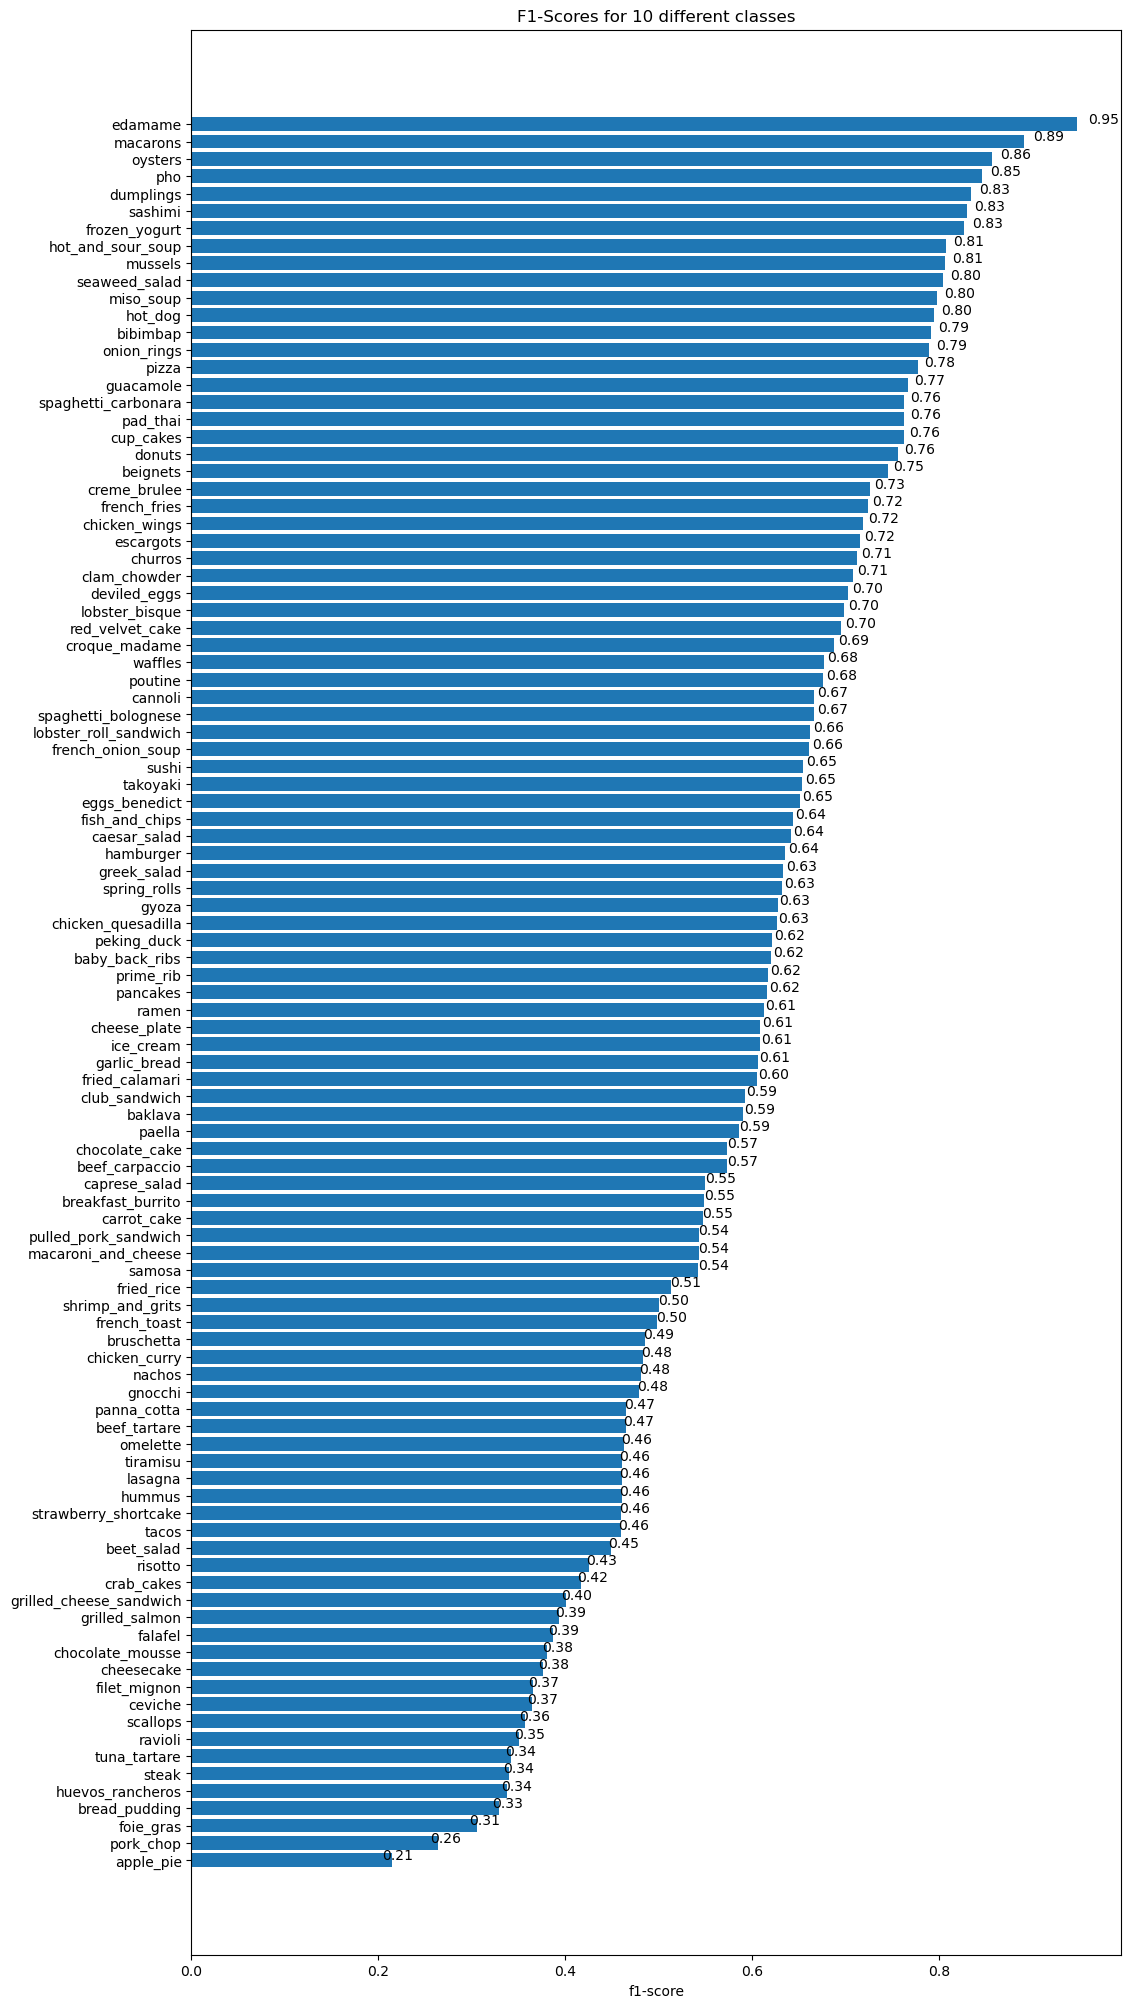

In [ ]:
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 different classes")
ax.invert_yaxis();

def autolabel(rects):
    """
    attach a text label above each bar displaying its height (it's value).
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(1.03 * width, rect.get_y() + rect.get_height() / 1.5,
                f"{width:.2f}",
                ha="center",
                va="bottom")

autolabel(scores)

##### Plot & Predict

1/1 [==============================] - 0s 29ms/step


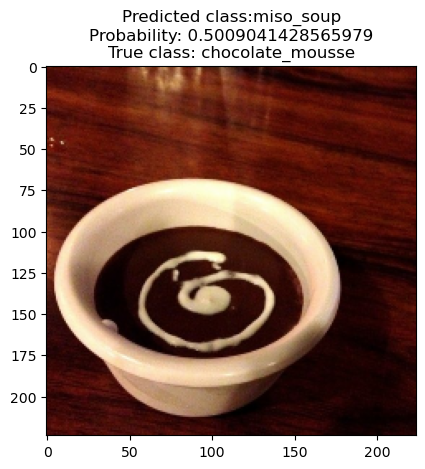

[[7.6817605e-03 1.5052734e-04 1.3113086e-03 2.9430239e-04 4.3673182e-04
  2.3657751e-04 1.5833715e-03 6.6787691e-04 1.7020421e-03 2.3468207e-04
  8.0233709e-05 4.3262079e-07 1.9447349e-03 8.9637819e-04 1.2583497e-04
  1.8830493e-04 1.2073039e-02 5.7372344e-03 2.0695792e-04 3.3476128e-05
  8.5840595e-04 2.4324089e-02 3.2159604e-02 1.4369420e-02 2.0488289e-03
  1.4738342e-05 1.3506674e-04 2.6238717e-03 6.0487444e-05 1.8037194e-02
  3.3324886e-02 7.4886680e-03 1.4363992e-02 1.2756870e-02 3.4259796e-05
  2.2389728e-03 1.6275217e-04 8.2205597e-04 7.6840761e-06 1.5092917e-03
  2.0222815e-03 6.8395154e-04 1.5345188e-04 1.1198291e-03 6.1963743e-05
  3.5672229e-02 2.5457559e-05 4.0249470e-05 9.1264409e-04 7.7959136e-05
  3.9983919e-04 3.9690360e-04 3.6519445e-03 1.3673364e-05 5.9014644e-02
  3.7850218e-04 9.0053691e-05 9.4322953e-03 2.7115445e-03 7.3763149e-05
  3.9804939e-02 2.7808812e-06 6.1312440e-04 5.0347694e-03 5.0090414e-01
  5.9866760e-04 1.4923561e-04 3.6590893e-06 3.7648240e-03 1.6963

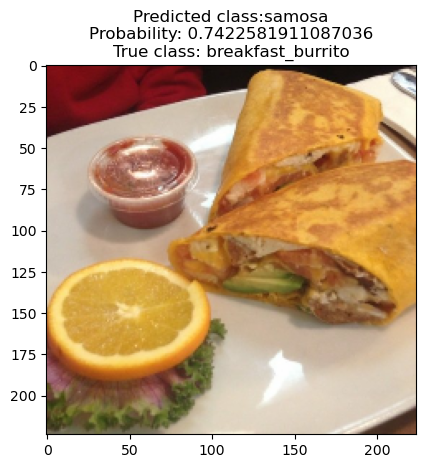

[[2.41138926e-03 3.27464186e-05 1.42337184e-03 3.95516054e-06
  1.00717321e-03 1.37520624e-06 1.22784024e-06 1.91963791e-05
  5.75918530e-05 8.17952305e-03 1.15470830e-04 4.16537205e-06
  8.21429348e-05 3.67849389e-05 4.77968060e-05 2.20862706e-03
  2.26966207e-04 9.17221332e-05 5.99533727e-04 2.29305308e-02
  1.48840454e-05 2.62072149e-06 5.69011390e-05 1.26929208e-05
  5.88931543e-05 1.04709167e-03 4.32814559e-04 6.70213703e-05
  3.48382033e-02 4.98733073e-07 4.26400493e-06 2.42584447e-05
  1.54272915e-04 2.09671398e-07 6.42777741e-05 8.96118814e-04
  6.36594021e-04 3.39314487e-04 4.72241454e-03 2.53583933e-03
  1.05641575e-05 3.65517131e-04 4.45182231e-05 4.81388179e-06
  1.67588348e-06 4.27337241e-08 8.14453000e-04 4.13302041e-06
  2.43096838e-06 5.41096926e-02 7.53814774e-03 1.21535501e-04
  1.89654529e-03 2.19792570e-03 2.86883665e-06 2.56581152e-05
  1.72950153e-03 1.33068953e-03 2.67641258e-06 1.72491837e-03
  5.16997243e-04 4.73756663e-05 3.29404109e-04 1.73600893e-05
  1.2697

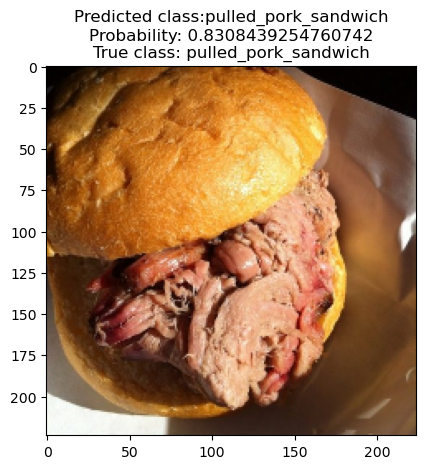

[[1.63954515e-02 1.17377176e-05 2.98538798e-04 1.39356598e-06
  2.90874188e-04 8.45599698e-06 2.09185280e-04 9.48874174e-07
  5.30108635e-04 1.55863163e-04 1.53978122e-04 1.67499422e-06
  2.69433542e-04 2.01201055e-06 3.13955607e-05 1.79906674e-05
  9.88567626e-06 1.71085427e-04 2.87868388e-05 9.73242186e-06
  6.06457070e-05 1.28416723e-04 1.76726462e-04 3.37158126e-04
  2.95335067e-05 8.79579457e-05 8.03471048e-05 3.32356976e-05
  2.35917119e-04 7.74094078e-05 3.19091168e-06 2.57900124e-03
  7.87850422e-06 2.27836358e-06 2.38467237e-05 2.61248556e-06
  7.00175005e-04 1.88751237e-05 1.24666106e-03 3.74489231e-04
  1.92116058e-05 1.59680829e-04 6.51210488e-04 1.40970060e-05
  2.12033729e-06 2.05529341e-06 2.46703916e-04 1.23661903e-06
  3.14231011e-06 2.11559981e-03 3.23054373e-05 1.01148544e-04
  1.11270247e-05 7.75950551e-02 3.61819434e-06 5.49901044e-04
  5.20476460e-05 8.15903695e-05 1.82177158e-04 3.01644359e-05
  5.70352458e-05 2.09537596e-02 1.07115527e-04 3.10082827e-03
  3.3142

In [ ]:
pick_predict(model=model_6_1, test_folder=test_dir)

#### 2. Evaluation Of 3 Custom Images With Food Vision Model

1/1 [==============================] - 2s 2s/step


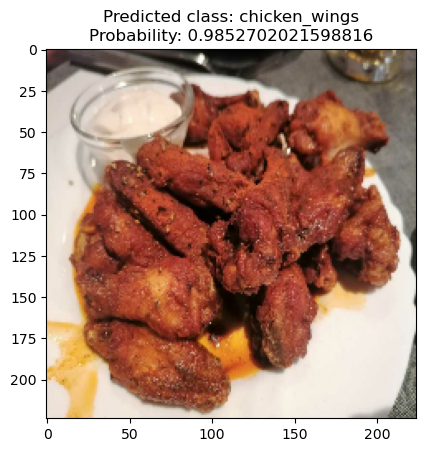

1/1 [==============================] - 0s 37ms/step


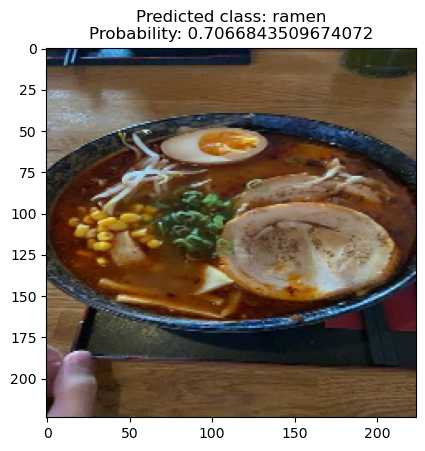

1/1 [==============================] - 0s 45ms/step


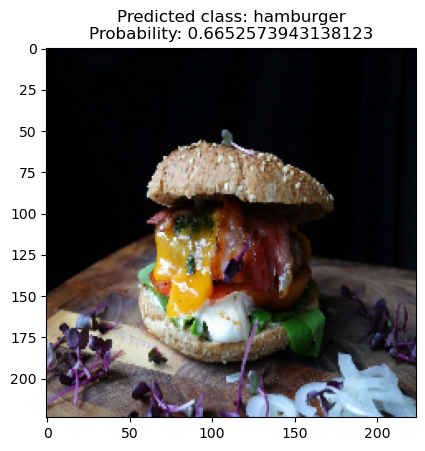

In [ ]:
custom_dir = "custom/"
for item in os.listdir(custom_dir):
    img = tf.io.read_file(custom_dir + item)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=[224, 224])

    pred = model_6_1a.predict(tf.expand_dims(img, axis=0))

    pred_class = class_names[pred.argmax()]

    plt.figure()
    plt.imshow(img/255)
    plt.title(f"Predicted class: {pred_class}\nProbability: {pred.max()}")
    plt.show();

#### 3. Retrain FE & FT Model With EfficientNetB4 As Base Model

##### Data From TF Datasets

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
datasets_list = tfds.list_builders()

In [ ]:
target_dataset = "food101"
print(f"'{target_dataset}' in TensorFlow Datasets: {target_dataset in datasets_list}")

'food101' in TensorFlow Datasets: True


In [ ]:
(train_data, test_data), ds_info = tfds.load(name=target_dataset,
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: ignored

In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
train_sample = train_data.take(1)
train_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_sample:
    print(f"""
    Image shape: {image.shape}
    Image dtype: {image.dtype}
    Class name (str form): {class_names[label.numpy()]}
    Target class from Food101 (tensor form): {label}
    """)


    Image shape: (512, 512, 3)
    Image dtype: <dtype: 'uint8'>
    Class name (str form): donuts
    Target class from Food101 (tensor form): 31
    


In [ ]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[131,  86,  55],
        [134,  89,  58],
        [137,  92,  61],
        ...,
        [131,  44,   0],
        [135,  49,   2],
        [138,  52,   5]],

       [[134,  89,  58],
        [135,  90,  59],
        [135,  90,  59],
        ...,
        [133,  46,   1],
        [134,  48,   1],
        [134,  48,   1]],

       [[136,  91,  60],
        [137,  92,  61],
        [139,  94,  63],
        ...,
        [137,  53,   7],
        [135,  51,   5],
        [131,  47,   1]],

       ...,

       [[130,  23,   3],
        [134,  31,  14],
        [132,  36,  24],
        ...,
        [243, 248, 242],
        [243, 248, 242],
        [243, 248, 242]],

       [[128,  22,   0],
        [129,  26,   7],
        [124,  28,  14],
        ...,
        [243, 248, 241],
        [242, 247, 240],
        [242, 247, 240]],

       [[132,  26,   2],
        [133,  31,   9],
        [126,  29,  13],
        ...,
        [242, 247, 24

In [ ]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

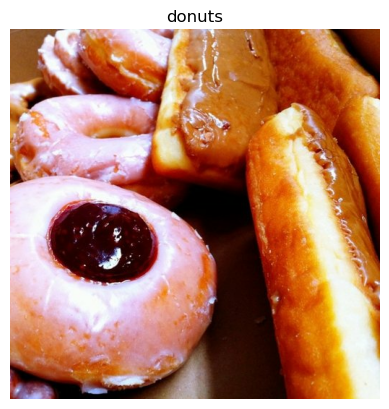

In [ ]:
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

In [ ]:
def preprocess_img(image, label, img_size=224):
    """
    converts image datatype from 'uint8' to 'float32'
    and resizes image to [img_size, img_size]
    """
    image = tf.image.resize(image, [img_size, img_size])
    return tf.cast(image, tf.float32), label # returns float32 version of image and label

In [ ]:
prep_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n{image[:2]}...\nShape: {image.shape}\nDatatype: {image.dtype}")
print(f"Image after preprocessing:\n{prep_img[:2]}...\nShape:{prep_img.shape}\nDatatype: {prep_img.dtype}")

Image before preprocessing:
[[[131  86  55]
  [134  89  58]
  [137  92  61]
  ...
  [131  44   0]
  [135  49   2]
  [138  52   5]]

 [[134  89  58]
  [135  90  59]
  [135  90  59]
  ...
  [133  46   1]
  [134  48   1]
  [134  48   1]]]...
Shape: (512, 512, 3)
Datatype: <dtype: 'uint8'>
Image after preprocessing:
[[[1.34030609e+02 8.90306168e+01 5.80306129e+01]
  [1.36045914e+02 9.10459213e+01 6.00459175e+01]
  [1.37846939e+02 9.28469391e+01 6.38469391e+01]
  ...
  [1.30265366e+02 4.79183846e+01 1.62753057e+00]
  [1.30760223e+02 4.37602272e+01 4.59267795e-02]
  [1.34739838e+02 4.87398338e+01 1.73983324e+00]]

 [[1.41551025e+02 9.65510254e+01 6.55510254e+01]
  [1.49081650e+02 1.04081635e+02 7.30816345e+01]
  [1.51632660e+02 1.06632652e+02 7.56326523e+01]
  ...
  [1.30357101e+02 4.85713654e+01 1.99989128e+00]
  [1.34147995e+02 5.01479988e+01 4.14799976e+00]
  [1.33571289e+02 4.95712891e+01 3.57128906e+00]]]...
Shape:(224, 224, 3)
Datatype: <dtype: 'float32'>


In [ ]:
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = test_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
print(train_data)
print(train_data_2)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


NameError: ignored

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")
mixed_precision.global_policy()

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070 SUPER, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2070 SUPER, compute capability 7.5


<Policy "mixed_float16">

##### Model Creation

In [ ]:
IMAGE_SIZE = (224, 224)
IMAGE_SHAPE = IMAGE_SIZE + (3,)

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB4(include_top=False)
base_model.trainable = False

In [ ]:
inputs = layers.Input(shape=IMAGE_SHAPE, name="input_layer")
# x = data_augmentation(inputs)
# x = base_model(x, training=False)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model_7_1 = tf.keras.Model(inputs, outputs, name="EffNetB4_FE")

In [ ]:
model_7_1.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

In [ ]:
model_7_1.summary()

Model: "EffNetB4_FE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, None, None, 1792)  17673823 
                                                                 
 global_average_pooling (Glo  (None, 1792)             0         
 balAveragePooling2D)                                            
                                                                 
 dense_2 (Dense)             (None, 101)               181093    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 17,854,916
Trainable params: 181,093
Non-

In [ ]:
for layer in model_7_1.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb4 False float32 <Policy "mixed_float16">
global_average_pooling True float32 <Policy "mixed_float16">
dense_2 True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [ ]:
for layer in model_7_1.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_3 False float32 <Policy "float32">
rescaling_4 False float32 <Policy "mixed_float16">
normalization_2 False float32 <Policy "mixed_float16">
rescaling_5 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1b_dwconv False float32 <P

In [ ]:
history_7_1 = model_7_1.fit(train_data,
                            epochs=3,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=int(0.15 * len(test_data)),
                            callbacks=[create_model_checkpoint(model_7_1.name, monitor="val_accuracy"), create_tensorboard_callback(model_7_1.name)])

saving TensorBoard data to tensorboard_data/EffNetB4_FE/20230622-160844
Epoch 1/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.7904 - accuracy: 0.5541
Epoch 1: val_accuracy improved from -inf to 0.67823, saving model to model_checkpoints\EffNetB4_FE
2368/2368 [==============================] - 179s 70ms/step - loss: 1.7904 - accuracy: 0.5541 - val_loss: 1.2505 - val_accuracy: 0.6782
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.3077 - accuracy: 0.6591
Epoch 2: val_accuracy improved from 0.67823 to 0.68512, saving model to model_checkpoints\EffNetB4_FE
2368/2368 [==============================] - 171s 72ms/step - loss: 1.3078 - accuracy: 0.6591 - val_loss: 1.1685 - val_accuracy: 0.6851
Epoch 3/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.1617 - accuracy: 0.6936
Epoch 3: val_accuracy improved from 0.68512 to 0.70418, saving model to model_checkpoints\EffNetB4_FE
2368/2368 [==============================] - 176s 74ms/step - 

In [ ]:
results_7_1 = model_7_1.evaluate(test_data)
results_7_1

790/790 [==============================] - 55s 69ms/step - loss: 1.1147 - accuracy: 0.7003


[1.1147332191467285, 0.700316846370697]

In [ ]:
results_7_1 = model_7_1.evaluate(test_data)
results_7_1

790/790 [==============================] - 49s 62ms/step - loss: 1.1226 - accuracy: 0.6979


[1.1225781440734863, 0.69786137342453]

In [ ]:
tf.keras.models.save_model(model_7_1, "saved_models/" + model_7_1.name)

INFO:tensorflow:Assets written to: saved_models/EffNetB4_FE\assets


INFO:tensorflow:Assets written to: saved_models/EffNetB4_FE\assets


In [ ]:
def create_model():
    input_shape = (224, 224, 3)
    base_model = tf.keras.applications.efficientnet.EfficientNetB4(include_top=False)
    base_model.trainable = False

    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
    x = layers.Dense(len(class_names))(x)

    outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_f32")(x)
    model = tf.keras.Model(inputs, outputs, name="EffNetB4_FE_cm")

    return model

created_model = create_model()
created_model.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

created_model.load_weights("model_checkpoints/" + model_7_1.name)

result_7_1_cm_lw = created_model.evaluate(test_data)

790/790 [==============================] - 56s 65ms/step - loss: 1.1147 - accuracy: 0.7003


In [ ]:
import numpy as np
assert np.isclose(results_7_1, result_7_1_cm_lw).all(), "Loaded weights results are not close to original model."

In [ ]:
for layer in created_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_4 False float32 <Policy "float32">
rescaling_6 False float32 <Policy "mixed_float16">
normalization_3 False float32 <Policy "mixed_float16">
rescaling_7 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1b_dwconv False float32 <P

In [ ]:
save_dir = "saved_models/07_EffNetB0_FE_mixedprec"
# tf.saved_model.save(model_7_1, save_dir)
tf.keras.models.save_model(model_7_1, save_dir)
# model_7_1.save(save_dir)
# above will result in TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

INFO:tensorflow:Assets written to: saved_models/07_EffNetB0_FE_mixedprec\assets


INFO:tensorflow:Assets written to: saved_models/07_EffNetB0_FE_mixedprec\assets


##### Fine-Tuning

In [ ]:
for layer in created_model.layers:
    layer.trainable = True
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb4 True float32 <Policy "mixed_float16">
global_average_pooling True float32 <Policy "mixed_float16">
dense_3 True float32 <Policy "mixed_float16">
softmax_f32 True float32 <Policy "float32">


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

In [ ]:
model_7_loaded = tf.keras.models.load_model(save_dir)
# model_7_loaded = tf.saved_model.load(save_dir)
result_7_loaded = model_7_loaded.evaluate(test_data)

790/790 [==============================] - 54s 64ms/step - loss: 1.1147 - accuracy: 0.7003


In [ ]:
for layer in model_7_loaded.layers:
    layer.trainable = True

In [ ]:
model_7_loaded.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
                       loss="sparse_categorical_crossentropy",
                       metrics=["accuracy"])

In [ ]:
finetune_epochs = 100

history_7_1a = model_7_loaded.fit(train_data,
                                  epochs=finetune_epochs,
                                  steps_per_epoch = len(train_data),
                                  validation_data=test_data,
                                  validation_steps=int(0.15 * len(test_data)),
                                  initial_epoch=history_7_1.epoch[-1],
                                  callbacks=[create_tensorboard_callback("EffNetB0_FEFT"),
                                             create_model_checkpoint(model_7_loaded.name, monitor="val_accuracy"),
                                             early_stopping,
                                             reduce_lr
                                             ])

saving TensorBoard data to tensorboard_data/EffNetB0_FEFT/20230622-170317
Epoch 3/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.9286 - accuracy: 0.7599
Epoch 3: val_accuracy improved from -inf to 0.71716, saving model to model_checkpoints\EffNetB4_FE
2368/2368 [==============================] - 183s 77ms/step - loss: 0.9286 - accuracy: 0.7599 - val_loss: 1.0598 - val_accuracy: 0.7172 - lr: 1.0000e-04
Epoch 4/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.9204 - accuracy: 0.7629
Epoch 4: val_accuracy improved from 0.71716 to 0.71928, saving model to model_checkpoints\EffNetB4_FE
2368/2368 [==============================] - 199s 84ms/step - loss: 0.9204 - accuracy: 0.7629 - val_loss: 1.0612 - val_accuracy: 0.7193 - lr: 1.0000e-04
Epoch 5/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.9127 - accuracy: 0.7650
Epoch 5: val_accuracy did not improve from 0.71928
2368/2368 [==============================] - 227s 95ms/step - loss: 0.9

In [ ]:
results_7_1_loaded = model_7_loaded.evaluate(test_data)

790/790 [==============================] - 24s 30ms/step - loss: 0.9506 - accuracy: 0.7413


In [ ]:
results_7_1_cm_ft = created_model.evaluate(test_data)

790/790 [==============================] - 47s 59ms/step - loss: 1.2337 - accuracy: 0.8308


In [ ]:
created_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, None, None, 1792)  17673823 
                                                                 
 global_average_pooling (Glo  (None, 1792)             0         
 balAveragePooling2D)                                            
                                                                 
 dense_2 (Dense)             (None, 101)               181093    
                                                                 
 softmax_f32 (Activation)    (None, 101)               0         
                                                                 
Total params: 17,854,916
Trainable params: 17,729,709
Non-trainable params: 125,207
_________________________________________

##### Automation Function for FE & FT

1. select the tf hub model
2. chose name for model
3. create function that takes base_model, model_name, train_data, test_data
 * function will create sequential model with input layer, base_layer, globalaveragepooling2d layer and dense layer
 * model will be compiled
 * FE model will be fitted 3 epochs, with callbacks
 * evaluation will be printed
 * base_layer will be processed for fine-tuning
 * seconday model will be created similar to first
 * model will be compiled
 * FT model will be fitted 100 epochs, with callbacks
 * evaluation will be printed

In [ ]:
import time

In [ ]:
def model_creation(base_model, model_name, input_shape=(224, 224, 3), dense_len=len(class_names)):
    """
    this function will create and return a model created with base_model, model_name and input_shape passed to it.
    """
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D(name="global_avg_pool2d_layer")(x)
    x = layers.Dense(dense_len)(x)
    outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_f32")(x)
    model = tf.keras.Model(inputs, outputs, name=model_name)
    return model

In [ ]:
def automate_fe_ft(base_model, model_name,
                   train_data=train_data, test_data=test_data,
                   input_shape=(224, 224, 3), class_names=class_names,
                   save_dir="saved_models/",
                   fe_epochs=3, ft_epochs=100,
                   fe_lr=0.001, ft_lr=0.0001,
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"],
                   ft_layer_count="all"):
    """
    this function will automate the feature extraction and fine tuning process.
    it will take the base_model and model_name, optionally also train_data, test_data and input_shape, epochs and learning rate values for fe and ft
    it will run a separate function to create a model, then compile, fit and evaluate it
    lastly, it will open the layers for fine tuning, then recompile the model, fit, evaluate and save it to save_dir + model_name
    """
    start_time = time.time()
    base_model.trainable = False
    print("\nFE model is being created...\n")
    model = model_creation(base_model, model_name, input_shape, dense_len=len(class_names))
    print("\nFE model is being compiled...\n")
    model.compile(optimizer=tf.keras.optimizers.Adam(fe_lr),
                  loss=loss,
                  metrics=metrics)
    print(model.summary())
    print("\nFE model is being fitted...\n")
    history_fe = model.fit(train_data,
                           epochs=3,
                           steps_per_epoch=len(train_data),
                           validation_data=test_data,
                           validation_steps=int(0.15*(len(test_data))),
                           callbacks=[create_model_checkpoint(model_name, monitor="val_accuracy"),
                                      create_tensorboard_callback(model_name),
                                      tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3),
                                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)])

    print("\nFE model is being evaluated...\n")
    results_fe = model.evaluate(test_data)
    save_dir = save_dir + model_name
    print(f"\nFitting is concluded, model will be saved to: {save_dir}...\n")
    tf.keras.models.save_model(model, save_dir)
    print("\nFT layers are being prepared...\n")
    if ft_layer_count == "all":
        print("All layers are being made trainable...\n")
        for layer in model.layers:
            layer.trainable=True
    elif ft_layer_count > 0:
        print(f"The last {ft_layer_count} layers are being made trainable...\n")
        for layer in model.layers[-ft_layer_count:]:
            layer.trainable=True

    print("\nFT model is being recompiled...\n")
    model.compile(optimizer=tf.keras.optimizers.Adam(ft_lr),
                  loss=loss,
                  metrics=metrics)

    print("\nFT model is being refitted...\n")
    history_ft = model.fit(train_data,
                           epochs=ft_epochs,
                           steps_per_epoch=len(train_data),
                           validation_data=test_data,
                           validation_steps=int(0.15*len(test_data)),
                           callbacks=[create_model_checkpoint(model_name+"_FT", monitor="val_accuracy"),
                                      create_tensorboard_callback(model_name+"_FT"),
                                      tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3),
                                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)])

    print("\nFT model is being evaluated...\n")
    results_ft = model.evaluate(test_data)

    print("\nFT model is being saved...\n")
    tf.keras.models.save_model(model, save_dir + "_FT")

    end_time = time.time()
    duration_sec = end_time - start_time
    duration_min = duration_sec//60
    rest_sec = duration_sec%60
    print(f"Total time was {duration_min} and {rest_sec} seconds.")
    result_dict = {
        "model":model,
        "results_FE": results_fe,
        "results_FT": results_ft,
        "history_FE": history_fe,
        "history_FT": history_ft,
        "duration": duration_sec
    }

    # return model, results_fe, history_fe, results_ft, history_ft
    return result_dict

In [ ]:
effinet_dict = {
    "EffNetV2_B0":tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False),
    "EffNetV2_B1":tf.keras.applications.efficientnet_v2.EfficientNetV2B1(include_top=False),
    "EffNetV2_B2":tf.keras.applications.efficientnet_v2.EfficientNetV2B2(include_top=False),
    "EffNetV2_B3":tf.keras.applications.efficientnet_v2.EfficientNetV2B3(include_top=False),
    "EffNetV2_S":tf.keras.applications.efficientnet_v2.EfficientNetV2S(include_top=False)
}

82420632/82420632 [==============================] - 4s 0us/step


In [ ]:
effdict_results = []
for item in effinet_dict:
    effdict_results.append(automate_fe_ft(effinet_dict[item], item))


FE model is being created...


FE model is being compiled...

Model: "EffNetV2_B0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_avg_pool2d_layer (Gl  (None, 1280)             0         
 obalAveragePooling2D)                                           
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_f32 (Activation)    (None, 101)               0         
                                                          

INFO:tensorflow:Assets written to: saved_models/EffNetV2_B0\assets


INFO:tensorflow:Assets written to: saved_models/EffNetV2_B0\assets



FT layers are being prepared...

All layers are being made trainable...


FT model is being recompiled...


FT model is being refitted...

saving TensorBoard data to tensorboard_data/EffNetV2_B0_FT/20230623-120849
Epoch 1/100
2368/2368 [==============================] - ETA: 0s - loss: 0.8704 - accuracy: 0.7651
Epoch 1: val_accuracy improved from -inf to 0.79025, saving model to model_checkpoints\EffNetV2_B0_FT
2368/2368 [==============================] - 237s 93ms/step - loss: 0.8704 - accuracy: 0.7651 - val_loss: 0.7667 - val_accuracy: 0.7903 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - ETA: 0s - loss: 0.5123 - accuracy: 0.8575
Epoch 2: val_accuracy improved from 0.79025 to 0.79714, saving model to model_checkpoints\EffNetV2_B0_FT
2368/2368 [==============================] - 236s 99ms/step - loss: 0.5123 - accuracy: 0.8575 - val_loss: 0.7405 - val_accuracy: 0.7971 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss: 0

INFO:tensorflow:Assets written to: saved_models/EffNetV2_B0_FT\assets


INFO:tensorflow:Assets written to: saved_models/EffNetV2_B0_FT\assets


Total time was 39.0 and 38.25659418106079 seconds.

FE model is being created...


FE model is being compiled...

Model: "EffNetV2_B1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b1 (Function  (None, None, None, 1280)  6931124  
 al)                                                             
                                                                 
 global_avg_pool2d_layer (Gl  (None, 1280)             0         
 obalAveragePooling2D)                                           
                                                                 
 dense_2 (Dense)             (None, 101)               129381    
                                                                 
 softmax_f32 (Activation)    (None, 101)               0         
       

INFO:tensorflow:Assets written to: saved_models/EffNetV2_B1\assets


INFO:tensorflow:Assets written to: saved_models/EffNetV2_B1\assets



FT layers are being prepared...

All layers are being made trainable...


FT model is being recompiled...


FT model is being refitted...

saving TensorBoard data to tensorboard_data/EffNetV2_B1_FT/20230623-124919
Epoch 1/100
2368/2368 [==============================] - ETA: 0s - loss: 0.8433 - accuracy: 0.7730
Epoch 1: val_accuracy improved from -inf to 0.80800, saving model to model_checkpoints\EffNetV2_B1_FT
2368/2368 [==============================] - 260s 103ms/step - loss: 0.8433 - accuracy: 0.7730 - val_loss: 0.6708 - val_accuracy: 0.8080 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - ETA: 0s - loss: 0.4730 - accuracy: 0.8675
Epoch 2: val_accuracy improved from 0.80800 to 0.80985, saving model to model_checkpoints\EffNetV2_B1_FT
2368/2368 [==============================] - 256s 108ms/step - loss: 0.4730 - accuracy: 0.8675 - val_loss: 0.6815 - val_accuracy: 0.8099 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss:

INFO:tensorflow:Assets written to: saved_models/EffNetV2_B1_FT\assets


INFO:tensorflow:Assets written to: saved_models/EffNetV2_B1_FT\assets


Total time was 40.0 and 27.16128373146057 seconds.

FE model is being created...


FE model is being compiled...

Model: "EffNetV2_B2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, None, None, 1408)  8769374  
 al)                                                             
                                                                 
 global_avg_pool2d_layer (Gl  (None, 1408)             0         
 obalAveragePooling2D)                                           
                                                                 
 dense_3 (Dense)             (None, 101)               142309    
                                                                 
 softmax_f32 (Activation)    (None, 101)               0         
       

INFO:tensorflow:Assets written to: saved_models/EffNetV2_B2\assets


INFO:tensorflow:Assets written to: saved_models/EffNetV2_B2\assets



FT layers are being prepared...

All layers are being made trainable...


FT model is being recompiled...


FT model is being refitted...

saving TensorBoard data to tensorboard_data/EffNetV2_B2_FT/20230623-132949
Epoch 1/100
2368/2368 [==============================] - ETA: 0s - loss: 0.8551 - accuracy: 0.7665
Epoch 1: val_accuracy improved from -inf to 0.80429, saving model to model_checkpoints\EffNetV2_B2_FT
2368/2368 [==============================] - 275s 109ms/step - loss: 0.8551 - accuracy: 0.7665 - val_loss: 0.7065 - val_accuracy: 0.8043 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.8733
Epoch 2: val_accuracy improved from 0.80429 to 0.80588, saving model to model_checkpoints\EffNetV2_B2_FT
2368/2368 [==============================] - 257s 108ms/step - loss: 0.4521 - accuracy: 0.8733 - val_loss: 0.6759 - val_accuracy: 0.8059 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss:

INFO:tensorflow:Assets written to: saved_models/EffNetV2_B2_FT\assets


INFO:tensorflow:Assets written to: saved_models/EffNetV2_B2_FT\assets


Total time was 59.0 and 8.441483736038208 seconds.

FE model is being created...


FE model is being compiled...

Model: "EffNetV2_B3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b3 (Function  (None, None, None, 1536)  12930622 
 al)                                                             
                                                                 
 global_avg_pool2d_layer (Gl  (None, 1536)             0         
 obalAveragePooling2D)                                           
                                                                 
 dense_4 (Dense)             (None, 101)               155237    
                                                                 
 softmax_f32 (Activation)    (None, 101)               0         
       

INFO:tensorflow:Assets written to: saved_models/EffNetV2_B3\assets


INFO:tensorflow:Assets written to: saved_models/EffNetV2_B3\assets



FT layers are being prepared...

All layers are being made trainable...


FT model is being recompiled...


FT model is being refitted...

saving TensorBoard data to tensorboard_data/EffNetV2_B3_FT/20230623-143006
Epoch 1/100
2368/2368 [==============================] - ETA: 0s - loss: 0.8483 - accuracy: 0.7699
Epoch 1: val_accuracy improved from -inf to 0.81939, saving model to model_checkpoints\EffNetV2_B3_FT
2368/2368 [==============================] - 339s 132ms/step - loss: 0.8483 - accuracy: 0.7699 - val_loss: 0.6552 - val_accuracy: 0.8194 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - ETA: 0s - loss: 0.3984 - accuracy: 0.8863
Epoch 2: val_accuracy did not improve from 0.81939
2368/2368 [==============================] - 311s 131ms/step - loss: 0.3984 - accuracy: 0.8863 - val_loss: 0.7067 - val_accuracy: 0.8056 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss: 0.1709 - accuracy: 0.9477
Epoch 3: val_accuracy impro

INFO:tensorflow:Assets written to: saved_models/EffNetV2_B3_FT\assets


INFO:tensorflow:Assets written to: saved_models/EffNetV2_B3_FT\assets


Total time was 61.0 and 14.785975456237793 seconds.

FE model is being created...


FE model is being compiled...

Model: "EffNetV2_S"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-s (Functiona  (None, None, None, 1280)  20331360 
 l)                                                              
                                                                 
 global_avg_pool2d_layer (Gl  (None, 1280)             0         
 obalAveragePooling2D)                                           
                                                                 
 dense_5 (Dense)             (None, 101)               129381    
                                                                 
 softmax_f32 (Activation)    (None, 101)               0         
       

INFO:tensorflow:Assets written to: saved_models/EffNetV2_S\assets


INFO:tensorflow:Assets written to: saved_models/EffNetV2_S\assets



FT layers are being prepared...

All layers are being made trainable...


FT model is being recompiled...


FT model is being refitted...

saving TensorBoard data to tensorboard_data/EffNetV2_S_FT/20230623-153330
Epoch 1/100
2368/2368 [==============================] - ETA: 0s - loss: 0.9008 - accuracy: 0.7570
Epoch 1: val_accuracy improved from -inf to 0.82521, saving model to model_checkpoints\EffNetV2_S_FT
2368/2368 [==============================] - 442s 175ms/step - loss: 0.9008 - accuracy: 0.7570 - val_loss: 0.6223 - val_accuracy: 0.8252 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - ETA: 0s - loss: 0.4006 - accuracy: 0.8866
Epoch 2: val_accuracy did not improve from 0.82521
2368/2368 [==============================] - 414s 174ms/step - loss: 0.4006 - accuracy: 0.8866 - val_loss: 0.6452 - val_accuracy: 0.8236 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss: 0.1653 - accuracy: 0.9506
Epoch 3: val_accuracy improve

INFO:tensorflow:Assets written to: saved_models/EffNetV2_S_FT\assets


INFO:tensorflow:Assets written to: saved_models/EffNetV2_S_FT\assets


Total time was 75.0 and 3.2855052947998047 seconds.


In [ ]:
effdict_results

[{'model': <keras.engine.functional.Functional at 0x1a57148b8b0>,
  'results_FE': [0.9929723739624023, 0.7299010157585144],
  'results_FT': [1.315421462059021, 0.8104950785636902],
  'history_FE': <keras.callbacks.History at 0x1a57175b130>,
  'history_FT': <keras.callbacks.History at 0x1a572b274f0>,
  'duration': 2378.256594181061},
 {'model': <keras.engine.functional.Functional at 0x1a64b3aca30>,
  'results_FE': [0.976649284362793, 0.734772264957428],
  'results_FT': [1.1607774496078491, 0.8221386075019836],
  'history_FE': <keras.callbacks.History at 0x1a64b3ae140>,
  'history_FT': <keras.callbacks.History at 0x1a64b4998a0>,
  'duration': 2427.1612837314606},
 {'model': <keras.engine.functional.Functional at 0x1a65fab3760>,
  'results_FE': [0.9921866655349731, 0.7318415641784668],
  'results_FT': [1.1751905679702759, 0.8336237668991089],
  'history_FE': <keras.callbacks.History at 0x1a65faceec0>,
  'history_FT': <keras.callbacks.History at 0x1a6931698a0>,
  'duration': 3548.441483736

In [ ]:
effdict_res_copy = effdict_results.copy()

In [ ]:
for res_dict in effdict_res_copy:
    res_dict["model_name"] = res_dict["model"].name
    res_dict["FE_loss"] = round(res_dict["results_FE"][0], 5)
    res_dict["FE_accuracy"] = round(res_dict["results_FE"][1], 5)
    res_dict["FT_loss"] = round(res_dict["results_FT"][0], 5)
    res_dict["FT_accuracy"] = round(res_dict["results_FT"][1], 5)
    duration_min = round(res_dict["duration"])//60
    rest_sec = round(res_dict["duration"])%60
    res_dict["total_time"] = f"{duration_min}m {rest_sec}s"
    res_dict["val_acc_hist"] = res_dict["history_FT"].history["val_accuracy"]
    res_dict["val_loss_hist"] = res_dict["history_FT"].history["val_loss"]

In [ ]:
effdict_res_copy

[{'model': <keras.engine.functional.Functional at 0x1a57148b8b0>,
  'results_FE': [0.9929723739624023, 0.7299010157585144],
  'results_FT': [1.315421462059021, 0.8104950785636902],
  'history_FE': <keras.callbacks.History at 0x1a57175b130>,
  'history_FT': <keras.callbacks.History at 0x1a572b274f0>,
  'duration': 2378.256594181061,
  'FE_loss': 0.99297,
  'FE_accuracy': 0.7299,
  'FT_loss': 1.31542,
  'FT_accuracy': 0.8105,
  'total_time': '39m 38s',
  'model_name': 'EffNetV2_B0',
  'val_acc_hist': [0.7902542352676392,
   0.7971398234367371,
   0.8064088821411133,
   0.8011122941970825,
   0.8146186470985413,
   0.8212394118309021,
   0.819915235042572,
   0.8159428238868713,
   0.8170021176338196],
  'val_loss_hist': [0.7666823267936707,
   0.7405142784118652,
   0.7535625100135803,
   0.8568254709243774,
   0.9495573043823242,
   1.0869719982147217,
   1.1434792280197144,
   1.2519993782043457,
   1.2845962047576904]},
 {'model': <keras.engine.functional.Functional at 0x1a64b3aca30>,

In [ ]:
effdict_results[0]["history_FT"].history["val_accuracy"]

[0.7902542352676392,
 0.7971398234367371,
 0.8064088821411133,
 0.8011122941970825,
 0.8146186470985413,
 0.8212394118309021,
 0.819915235042572,
 0.8159428238868713,
 0.8170021176338196]

In [ ]:
dict_keys = ["model_name", "FE_loss", "FE_accuracy", "FT_loss", "FT_accuracy", "val_acc_hist", "val_loss_hist", "total_time"]

effresult_list = []

for item in effdict_results:
    effresult_list.append({k:item[k] for k in dict_keys})

effresult_list

[{'model_name': 'EffNetV2_B0',
  'FE_loss': 0.99297,
  'FE_accuracy': 0.7299,
  'FT_loss': 1.31542,
  'FT_accuracy': 0.8105,
  'val_acc_hist': [0.7902542352676392,
   0.7971398234367371,
   0.8064088821411133,
   0.8011122941970825,
   0.8146186470985413,
   0.8212394118309021,
   0.819915235042572,
   0.8159428238868713,
   0.8170021176338196],
  'val_loss_hist': [0.7666823267936707,
   0.7405142784118652,
   0.7535625100135803,
   0.8568254709243774,
   0.9495573043823242,
   1.0869719982147217,
   1.1434792280197144,
   1.2519993782043457,
   1.2845962047576904],
  'total_time': '39m 38s'},
 {'model_name': 'EffNetV2_B1',
  'FE_loss': 0.97665,
  'FE_accuracy': 0.73477,
  'FT_loss': 1.16078,
  'FT_accuracy': 0.82214,
  'val_acc_hist': [0.8079978823661804,
   0.8098517060279846,
   0.805349588394165,
   0.8217690587043762,
   0.8252118825912476,
   0.820709764957428,
   0.819650411605835,
   0.8204449415206909],
  'val_loss_hist': [0.6708295941352844,
   0.6815121173858643,
   0.746531

In [ ]:
effnet_df = pd.DataFrame(effresult_list)

model_name  FE_loss  FE_accuracy  FT_loss  FT_accuracy  \
0  EffNetV2_B0  0.99297      0.72990  1.31542      0.81050   
1  EffNetV2_B1  0.97665      0.73477  1.16078      0.82214   
2  EffNetV2_B2  0.99219      0.73184  1.17519      0.83362   
3  EffNetV2_B3  1.02078      0.72368  1.14457      0.83461   
4   EffNetV2_S  1.04798      0.71600  1.06846      0.85283   

                                        val_acc_hist  \
0  [0.7902542352676392, 0.7971398234367371, 0.806...   
1  [0.8079978823661804, 0.8098517060279846, 0.805...   
2  [0.804290235042572, 0.8058792352676392, 0.8159...   
3  [0.8193855881690979, 0.8056144118309021, 0.822...   
4  [0.8252118825912476, 0.8236228823661804, 0.836...   

                                       val_loss_hist total_time  
0  [0.7666823267936707, 0.7405142784118652, 0.753...    39m 38s  
1  [0.6708295941352844, 0.6815121173858643, 0.746...    40m 27s  
2  [0.7065257430076599, 0.6758920550346375, 0.727...     59m 8s  
3  [0.655249297618866, 0.7066752910614014, 0.6948...    61m 15s  
4  [0.6222777962684631, 0.6451650857925415, 0.654...     75m 3s

In [ ]:
effnet_df.val_acc_hist[0]

list

In [ ]:
plt.figure(figsize=(12, 9))
plt.title("Accuracy&Loss of EfficientNet FT training")
for d in [effnetb0_results,effnetb4_results,effnetv2b0_results,effnetv2b3_results]:
    pd.Series(d["history_FT"].history["val_accuracy"]).plot()
    pd.Series(d["history_FT"].history["val_loss"]).plot()
plt.legend(["EN_B0 acc", "EN_B0 loss", "EN_B4 acc", "EN_B4 loss", "EN_V2_B0 acc", "EN_V2_B0 loss", "EN_V2_B3 acc", "EN_V2_B3 loss"])
plt.show()

In [ ]:
dict_keys = ["FE_loss", "FE_accuracy", "FT_loss", "FT_accuracy"]


result_dict_EN_B0 = {k:effnetb0_results[k] for k in dict_keys}
result_dict_EN_B4 = {k:effnetb4_results[k] for k in dict_keys}
result_dict_EN_V2_B0 = {k:effnetv2b0_results[k] for k in dict_keys}
result_dict_EN_V2_B3 = {k:effnetv2b3_results[k] for k in dict_keys}

In [ ]:
result_dict_EN_B0

{'FE_loss': 1.0007891654968262,
 'FE_accuracy': 0.7267326712608337,
 'FT_loss': 1.3400452136993408,
 'FT_accuracy': 0.8027326464653015,
 'duration': 2319.727613925934}

In [ ]:
effnetb0_results["model"].name

'EffNetB0_1'

In [ ]:
effnetb0_results["results_FE"][0]

1.0007891654968262

In [ ]:
results_df = pd.DataFrame({"EfficientNet_B0": pd.Series(result_dict_EN_B0),
                          "EfficientNet_B4": pd.Series(result_dict_EN_B4),
                          "EfficientNet_V2_B0": pd.Series(result_dict_EN_V2_B0),
                          "EfficientNet_V2_B3": pd.Series(result_dict_EN_V2_B3)})

In [ ]:
results_df = results_df.T

In [ ]:
results_df["duration"].max()

5129.893475532532

In [ ]:
results_df["dur_scaled"] = results_df["duration"]/results_df["duration"].max()

<Axes: >

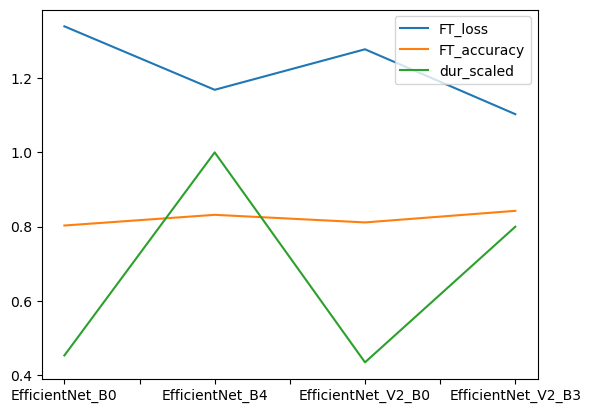

In [ ]:
results_df[["FT_loss", "FT_accuracy", "dur_scaled"]].plot()

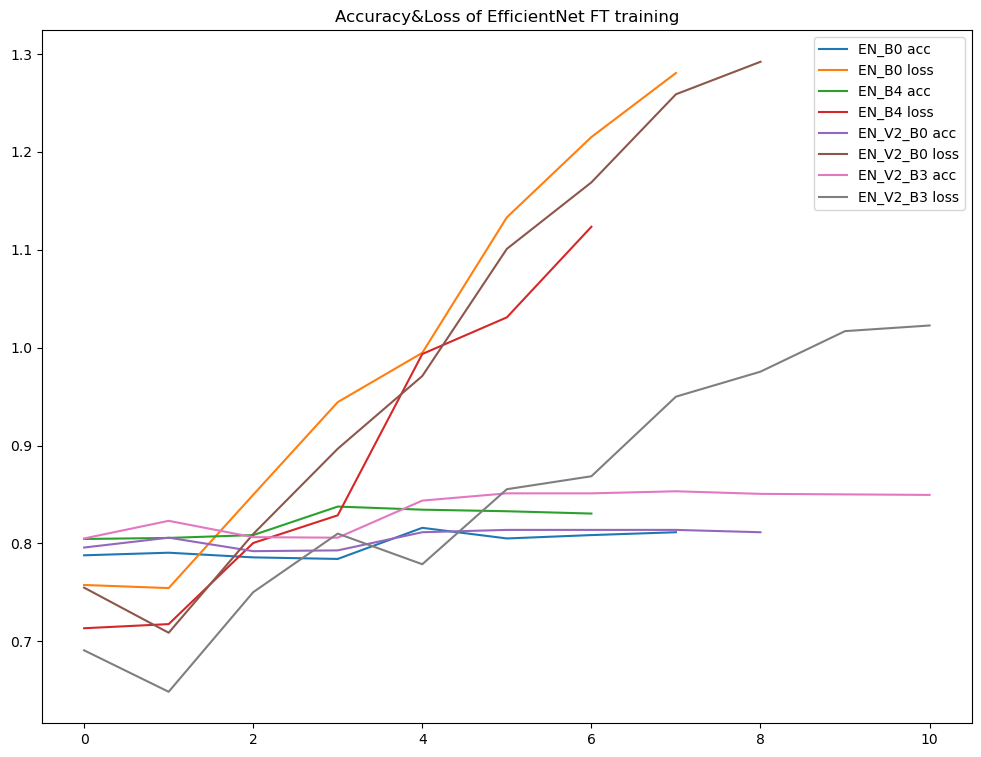

In [ ]:
plt.figure(figsize=(12, 9))
plt.title("Accuracy&Loss of EfficientNet FT training")
for d in [effnetb0_results,effnetb4_results,effnetv2b0_results,effnetv2b3_results]:
    pd.Series(d["history_FT"].history["val_accuracy"]).plot()
    pd.Series(d["history_FT"].history["val_loss"]).plot()
plt.legend(["EN_B0 acc", "EN_B0 loss", "EN_B4 acc", "EN_B4 loss", "EN_V2_B0 acc", "EN_V2_B0 loss", "EN_V2_B3 acc", "EN_V2_B3 loss"])
plt.show()

In [ ]:
results_df

FE_loss  FE_accuracy   FT_loss  FT_accuracy     duration  \
EfficientNet_B0     1.000789     0.726733  1.340045     0.802733  2319.727614   
EfficientNet_B4     1.113235     0.699248  1.168825     0.831564  5129.893476   
EfficientNet_V2_B0  0.989592     0.734337  1.278139     0.811050  2224.238069   
EfficientNet_V2_B3  1.015378     0.723762  1.103082     0.842297  4101.088792   

                    dur_scaled  
EfficientNet_B0       0.452198  
EfficientNet_B4       1.000000  
EfficientNet_V2_B0    0.433584  
EfficientNet_V2_B3    0.799449

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive/TF_sources

/content/drive/MyDrive/TF_sources


In [ ]:
%ls

10_food_classes_all_data/     cameras/   model_checkpoints/
10_food_classes_all_data.zip  __MACOSX/
